**Mid-bootcamp project: Regression**

# Import tools

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

# Load data



**Importing SQL query**

In [2]:
from sqlalchemy import create_engine
import pandas as pd
import getpass  
password = getpass.getpass()

········


In [3]:
# Establishing the connection with MySQL
connection_string = 'mysql+pymysql://root:' + password + '@localhost/house_price_regression'
engine = create_engine(connection_string)
data = pd.read_sql_query('SELECT * from house_price_data', engine)
data.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3        1.0         1180      5650     1.0           0   
1  6414100192         3        2.0         2570      7242     2.0           0   
2  5631500400         2        1.0          770     10000     1.0           0   
3  2487200875         4        3.0         1960      5000     1.0           0   
4  1954400510         3        2.0         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15   price  
0    98178  47.5112 -122.257           1340        5650  221900  
1    98125  47.7210 -122.319           1690        7639  538000  
2    98028  47.7379 -122.233           2720        8062  180000  
3    98136  47.5208 -122.393           1360        5000  604000  
4    98074  47.6168 -122.045           1800        7503  510000

# Exploration of the data

In [4]:
data.shape

(21597, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [6]:
data.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [7]:
data.isin(['', ' ']).sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [8]:
data.describe()

id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   4.580474e+09      3.373200      2.313655   2080.321850  1.509941e+04   
std    2.876736e+09      0.926299      0.864160    918.106125  4.141264e+04   
min    1.000102e+06      1.000000      1.000000    370.000000  5.200000e+02   
25%    2.123049e+09      3.000000      2.000000   1430.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.000000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      3.000000   2550.000000  1.068500e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.542205      0.007547      0.234292      3.409825      7.657915   
std        0.567159      0.086549      0.766390      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        2.000000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        4.000000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     291.725008   1970.999676     84.464787  98077.951845   
std      827.759761     442.667800     29.375234    401.821438     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15         price  
count  21597.000000  21597.000000   21597.000000   21597.000000  2.159700e+04  
mean      47.560093   -122.213982    1986.620318   12758.283512  5.402966e+05  
std        0.138552      0.140724     685.230472   27274.441950  3.673681e+05  
min       47.155900   -122.519000     399.000000     651.000000  7.800000e+04  
25%       47.471100   -122.328000    1490.000000    5100.000000  3.220000e+05  
50%       47.571800   -122.231000    1840.000000    7620.000000  4.500000e+05  
75%       47.678000   -122.125000    2360.000000   10083.000000  6.450000e+05  
max       47.777600   -121.315000    6210.000000  871200.000000  7.700000e+06

**Splitting continuous and discrete values (Sara)**

In [9]:
continuous_data = pd.DataFrame()
discrete_data = pd.DataFrame()

for i in data:
    if len(data[i].unique()) < 120:
        discrete_data[i] = data[i]
    else:
        continuous_data[i] = data[i]

**Exploring the unique values**

In [10]:
for i in data.columns.tolist():         
    print(i, len(data[i].unique()))

id 21420
bedrooms 12
bathrooms 8
sqft_living 1034
sqft_lot 9776
floors 4
waterfront 2
view 5
condition 5
grade 11
sqft_above 942
sqft_basement 306
yr_built 116
yr_renovated 70
zipcode 70
lat 5033
long 751
sqft_living15 777
sqft_lot15 8682
price 3622


In [11]:
#check quantity of each unique value per column
for i in data:
    print('Catagory: ', i)
    print(data[i].value_counts())
    print('\n')

Catagory:  id
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64


Catagory:  bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


Catagory:  bathrooms
2.0    8470
3.0    7904
1.0    3935
4.0    1101
5.0     157
6.0      22
7.0       4
8.0       4
Name: bathrooms, dtype: int64


Catagory:  sqft_living
1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64


Catagory:  sqft_lot
5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64


Catagory:  floor

In [12]:
# checking uniques values that are less than 100
for i in data:
    if len(data[i].unique()) < 100:
        print('.....',i,'.....')
        print( data[i].unique())

..... bedrooms .....
[ 3  2  4  5  1  6  7  8  9 11 10 33]
..... bathrooms .....
[1. 2. 3. 5. 4. 6. 7. 8.]
..... floors .....
[1. 2. 3. 4.]
..... waterfront .....
[0 1]
..... view .....
[0 3 4 2 1]
..... condition .....
[3 5 4 1 2]
..... grade .....
[ 7  6  8 11  9  5 10 12  4  3 13]
..... yr_renovated .....
[   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 1976 1946 1975 1958 1964 1959 1960 1967 1965 1934 1944]
..... zipcode .....
[98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 981

id


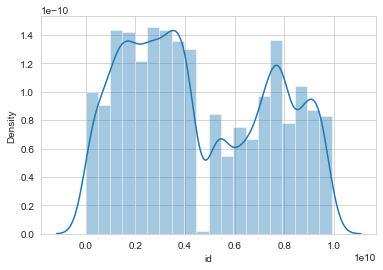

sqft_living


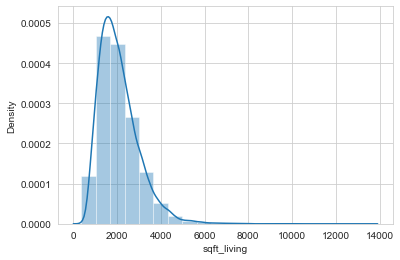

sqft_lot


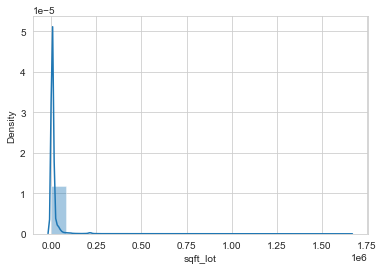

sqft_above


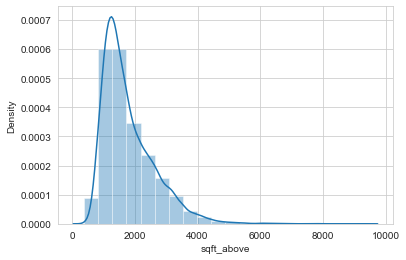

sqft_basement


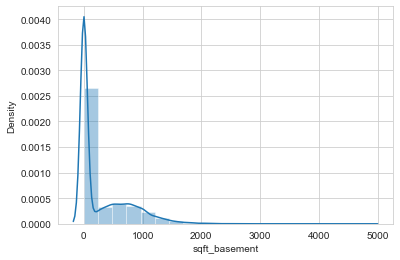

lat


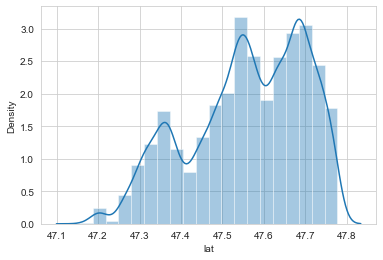

long


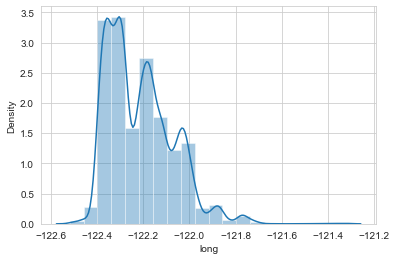

sqft_living15


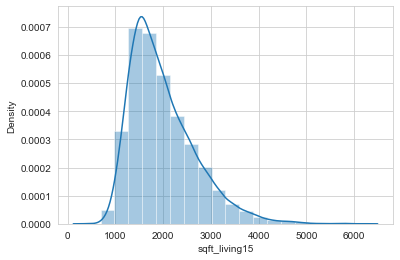

sqft_lot15


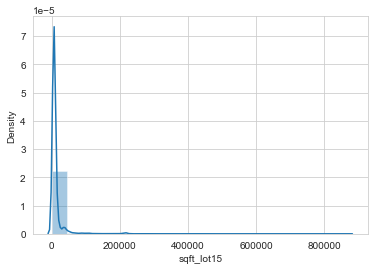

price


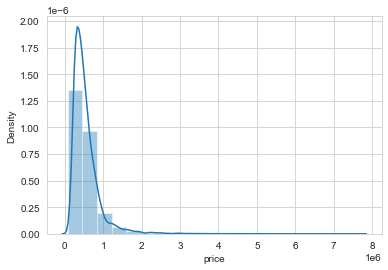

In [13]:
# printing the distribution plot of the columns
for i in continuous_data:
    print(i)
    sns.distplot(data[i], bins=20)
    plt.show()

**Checking the outliers**

id has no outliers

bedrooms
The upper whisker is at: 5.50
The number of points outside the upper whisker is:  334
Percentage from total 1.55 %


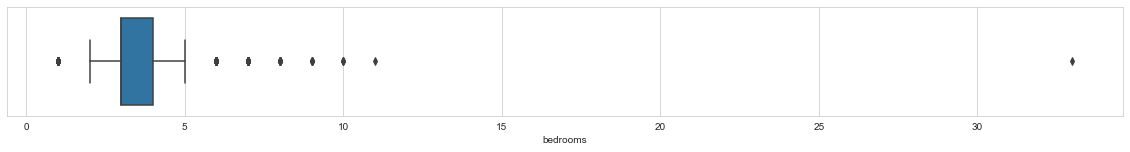


bathrooms
The upper whisker is at: 4.50
The number of points outside the upper whisker is:  187
Percentage from total 0.87 %


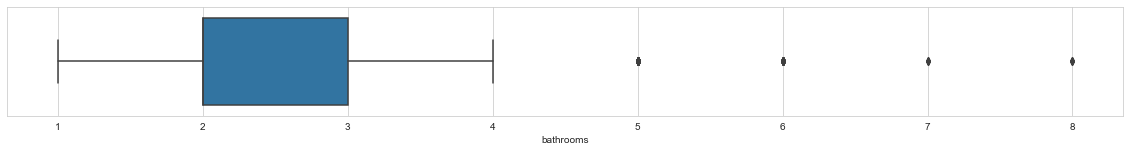


sqft_living
The upper whisker is at: 4230.00
The number of points outside the upper whisker is:  571
Percentage from total 2.64 %


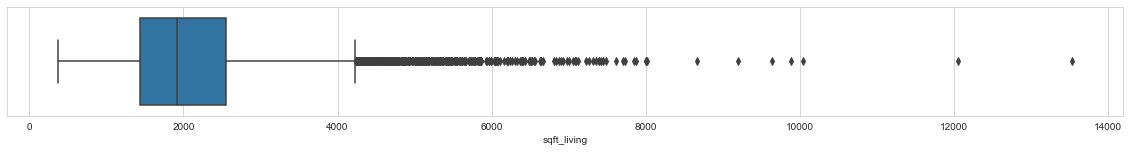


sqft_lot
The upper whisker is at: 19152.50
The number of points outside the upper whisker is:  2419
Percentage from total 11.2 %


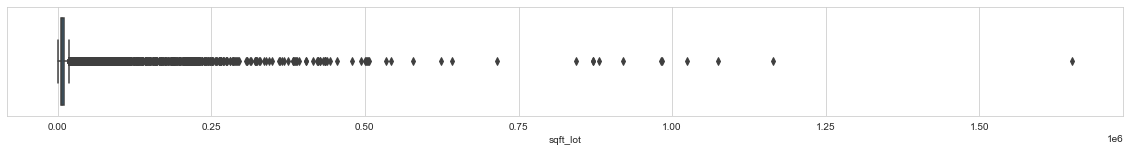


floors
The upper whisker is at: 3.50
The number of points outside the upper whisker is:  7
Percentage from total 0.03 %


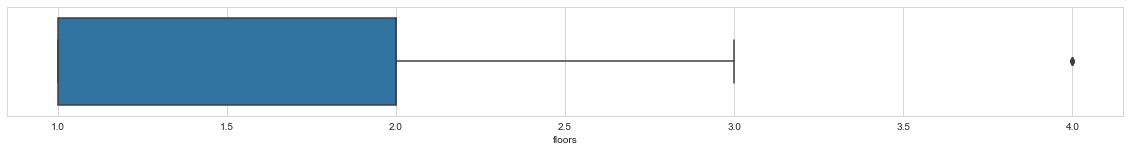


waterfront
The upper whisker is at: 0.00
The number of points outside the upper whisker is:  163
Percentage from total 0.75 %


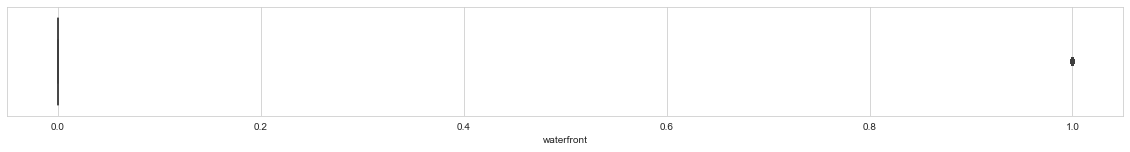


view
The upper whisker is at: 0.00
The number of points outside the upper whisker is:  2122
Percentage from total 9.83 %


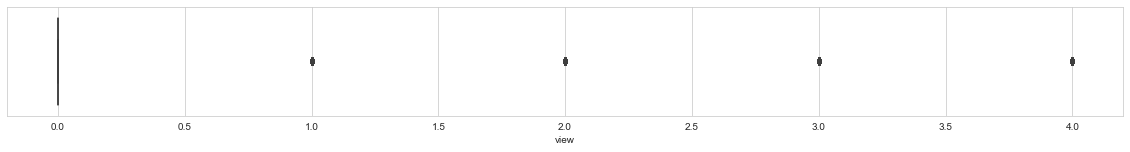


condition has no outliers

grade
The upper whisker is at: 9.50
The number of points outside the upper whisker is:  1635
Percentage from total 7.57 %


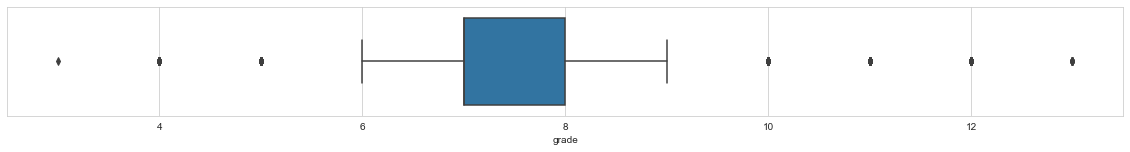


sqft_above
The upper whisker is at: 3740.00
The number of points outside the upper whisker is:  610
Percentage from total 2.82 %


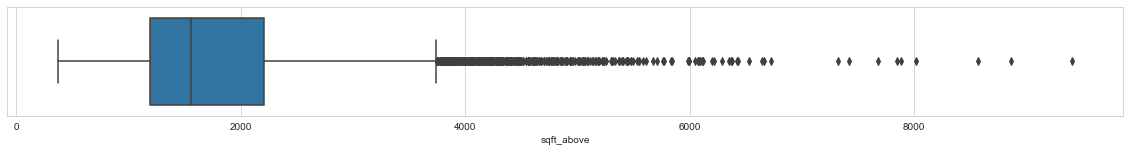


sqft_basement
The upper whisker is at: 1400.00
The number of points outside the upper whisker is:  496
Percentage from total 2.3 %


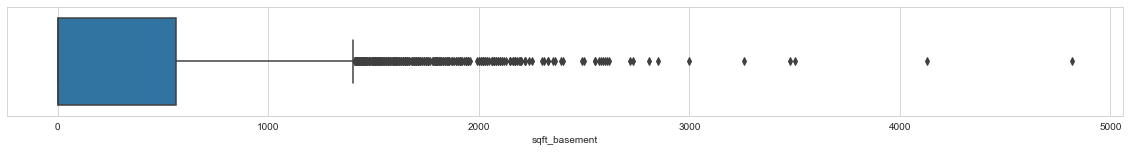


yr_built has no outliers

yr_renovated
The upper whisker is at: 0.00
The number of points outside the upper whisker is:  914
Percentage from total 4.23 %


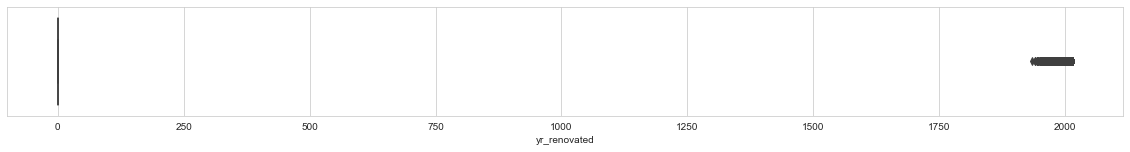


zipcode has no outliers

lat has no outliers

long
The upper whisker is at: -121.82
The number of points outside the upper whisker is:  255
Percentage from total 1.18 %


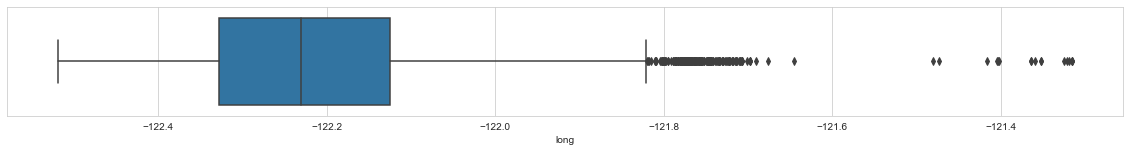


sqft_living15
The upper whisker is at: 3665.00
The number of points outside the upper whisker is:  543
Percentage from total 2.51 %


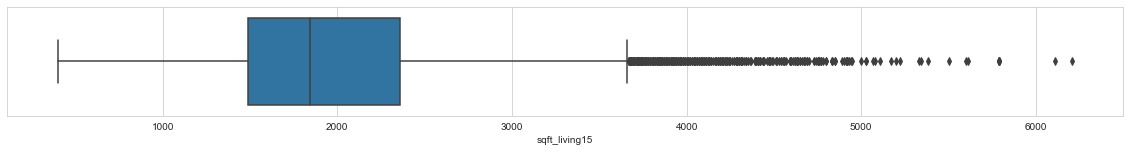


sqft_lot15
The upper whisker is at: 17557.50
The number of points outside the upper whisker is:  2188
Percentage from total 10.13 %


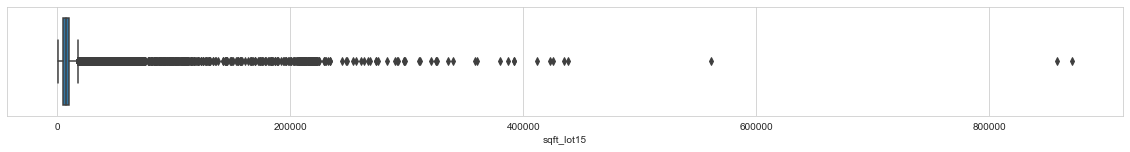


price
The upper whisker is at: 1129500.00
The number of points outside the upper whisker is:  1158
Percentage from total 5.36 %


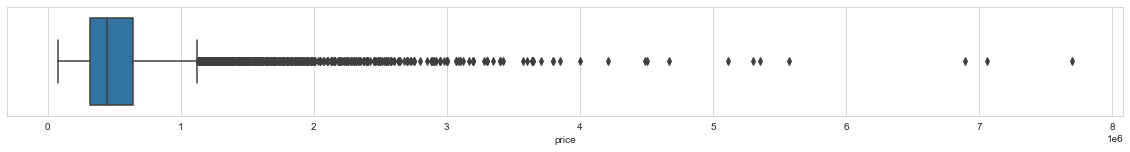

name   perc
4        sqft_lot  11.20
18     sqft_lot15  10.13
7            view   9.83
9           grade   7.57
19          price   5.36
13   yr_renovated   4.23
10     sqft_above   2.82
3     sqft_living   2.64
17  sqft_living15   2.51
11  sqft_basement   2.30
1        bedrooms   1.55
16           long   1.18
2       bathrooms   0.87
6      waterfront   0.75
5          floors   0.03
8       condition   0.00
12       yr_built   0.00
14        zipcode   0.00
15            lat   0.00
0              id   0.00

In [14]:
outliers_list = pd.DataFrame (columns = ['name', 'perc'])
def get_outliers(data):
    outliers_list = pd.DataFrame (columns = ['name', 'perc'])
    for i in data:  
        iqr = np.percentile(data[i],75) - np.percentile(data[i],25)
        upper_limit = np.percentile(data[i],75) + 1.5*iqr    
        outliers = data[data[i] > upper_limit].index.tolist()       
        
        
        if len(outliers) > 0:
            print (i)
            print("The upper whisker is at: %4.2f" % upper_limit)
            print("The number of points outside the upper whisker is: ",len(outliers))
            print("Percentage from total", round(len(outliers)*100/len(data[i]),2), '%')
            ax, fig = plt.subplots(figsize = (20,2))
            sns.boxplot(x=i, data=data)
            plt.show()
        else:
            print (i, 'has no outliers')
        print()
        
        perc = round(len(outliers)*100/len(data[i]),2)
        outliers_list = outliers_list.append({'name': i, 'perc': perc}, ignore_index=True)
    outliers_list = outliers_list.sort_values(by=['perc'],ascending=False)
    return outliers_list
        

get_outliers(data)


**Exploring the continuous data**

In [15]:
# checking the skewness 
from scipy.stats import skew
continuous_data.apply(skew)

id                0.243209
sqft_living       1.473113
sqft_lot         13.071696
sqft_above        1.447334
sqft_basement     1.576780
lat              -0.485488
long              0.884827
sqft_living15     1.106799
sqft_lot15        9.523700
price             4.023085
dtype: float64

In [16]:
# checking kurtosis 
from scipy.stats import kurtosis
for i in continuous_data:
    print(i, '--------', kurtosis(continuous_data[i]))

id -------- -1.2607358354976048
sqft_living -------- 5.2506082929452305
sqft_lot -------- 285.4294421924969
sqft_above -------- 3.4044535844211197
sqft_basement -------- 2.7108927221612102
lat -------- -0.6759115696228024
long -------- 1.0515989487041466
sqft_living15 -------- 1.5910865015946518
sqft_lot15 -------- 151.3603368316641
price -------- 34.53308449607733


Q-Q plot for variable: id


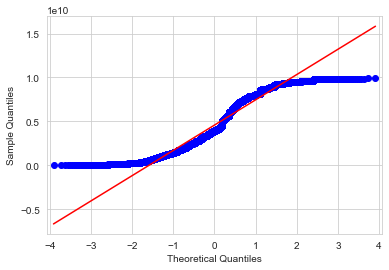

Q-Q plot for variable: sqft_living


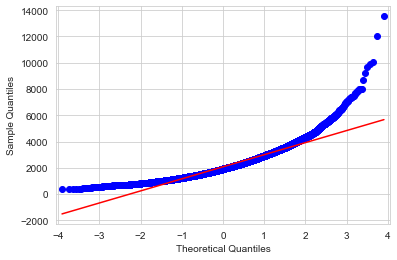

Q-Q plot for variable: sqft_lot


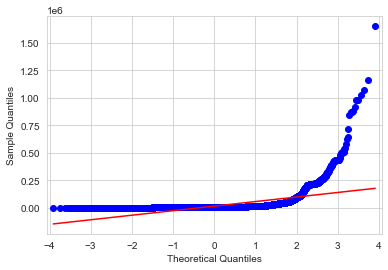

Q-Q plot for variable: sqft_above


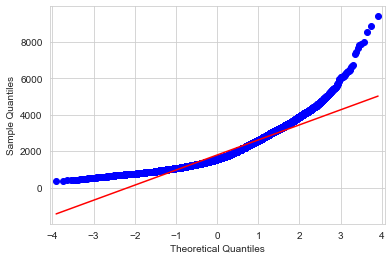

Q-Q plot for variable: sqft_basement


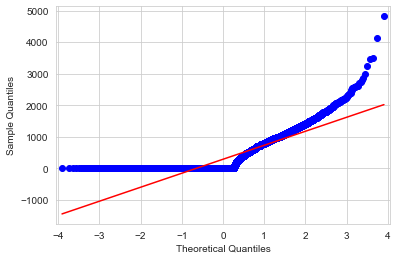

Q-Q plot for variable: lat


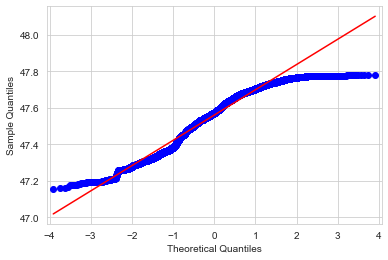

Q-Q plot for variable: long


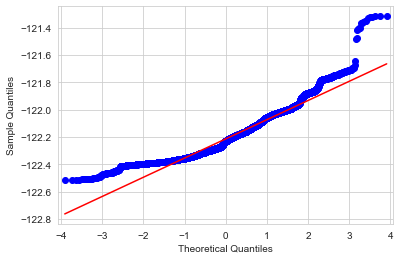

Q-Q plot for variable: sqft_living15


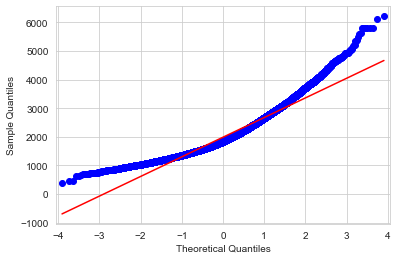

Q-Q plot for variable: sqft_lot15


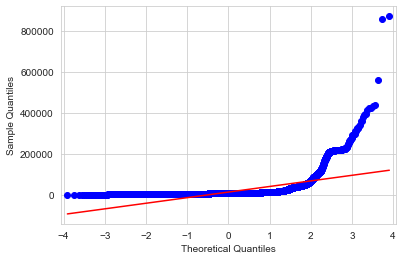

Q-Q plot for variable: price


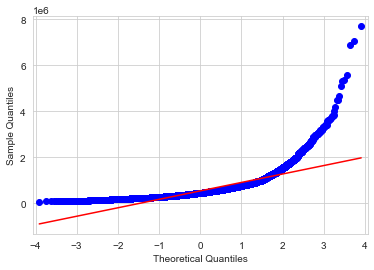

In [17]:
# qualitative test of normality (Q-Q Plot)
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
 
cols = list(continuous_data.columns)
for col in cols:
    print('Q-Q plot for variable:', col)
    qqplot(continuous_data[col], line='s')
    plt.show()

# Cleaning the data

**Dropping the 'Id' column**



In [18]:
data = data.drop(['id'], axis=1)
#in a later attempt we still use the id to drop duplicates

**Replacing the value 33 in 'bedrooms' for 3 (possible typo)**


In [19]:
data['bedrooms'] = data['bedrooms'].replace(33, 3)

# Check for multicollinearity

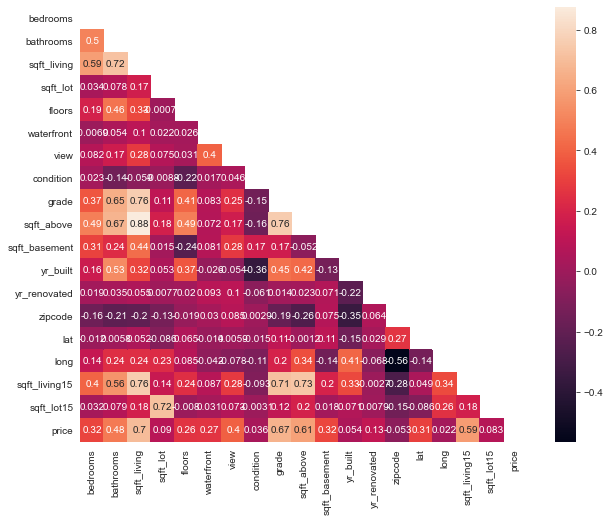

In [20]:
corr_data = data
 
correlations_matrix = corr_data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show() # Half correlation matrix

# Data transformation

**Prepared a master function for data transformations**

In [21]:
def log_transform_clean(x):
    if np.isfinite(x) and x != 0:
        return np.log(x)
    else:
        return np.NAN

**Prepared a master function for log transformation and scale of the data**




In [22]:
def log_scale_model(dataset, target_column, log_column, scale):
    # log scale on target column target_column
    dataset[target_column] = data[target_column].apply(log_transform_clean)
    
    # log scale on columns 'sqft_lot' and 'sqft_lot15'
    for i in log_column:
        dataset[i] = dataset[i].apply(log_transform_clean)
    # dropping the target feature
    X = dataset.drop([target_column], axis=1)
    y = dataset[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    # removing the features that were trasformed with log
    # X_train
    X_train_log_features = pd.DataFrame()
    for i in log_column:
        X_train_log_features[i] = X_train[i]
        X_train = X_train.drop([i], axis=1)
    # X_test
    X_test_log_features = pd.DataFrame()    
    for i in log_column:
        X_test_log_features[i] = X_test[i]
        X_test = X_test.drop([i], axis=1)

    # scale of the data
    if scale == 'StandardScaler':
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform (X_test)
    elif scale == 'MinMaxScaler':
        from sklearn.preprocessing import MinMaxScaler
        minmax =  MinMaxScaler()
        X_train = minmax.fit_transform(X_train)
        X_test = minmax.transform (X_test)
    elif scale == 'Normalizer':
        # applying the normalizer
        from sklearn.preprocessing import Normalizer
        norm =  Normalizer()
        X_train = norm.fit_transform(X_train)
        X_test = norm.transform (X_test)
        
    
    # reseting indexes for X_train and X_test and concatenating them with the features transformed with log
    # X_train
    X_train_log_features = X_train_log_features.reset_index()
    X_train_log_features = X_train_log_features.drop(['index'], axis=1)
    X_train = pd.DataFrame(X_train)
    for i in log_column:
        X_train = pd.concat([X_train, X_train_log_features[i]], axis=1)
    # X_test
    X_test_log_features = X_test_log_features.reset_index()
    X_test_log_features = X_test_log_features.drop(['index'], axis=1)
    X_test = pd.DataFrame(X_test)
    for i in log_column:
        X_test = pd.concat([X_test, X_test_log_features[i]], axis=1)
    
    # undoing the log of the target
    y_train = np.exp(y_train)
    y_test = np.exp(y_test)

    # model evaluation
    return model_evaluation(X_train, X_test, y_train, y_test)        
    

# Model

**Prepared a master function to get the error metrics from the models and an automatic evaluation which model is best.**

In [23]:
def get_metrics(y_test,predictions,X_test):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.metrics import r2_score

    mae = round(mean_absolute_error(y_test,predictions),3)
    mse = round(mean_squared_error(y_test,predictions),3)
    root_mse = round(np.sqrt(mean_squared_error(y_test,predictions)),3)
    r2 = round(r2_score(y_test, predictions),3)
    N = len(X_test)
    p = X_test.shape[1]
    adj_r2 = 1-((1-r2)*(N-1)/(N-p-1))
    adjusted_R2 = round(adj_r2, 2)
    re = round(np.mean(np.abs((y_test - predictions) / y_test)), 2)
    return mae, mse,root_mse,r2,adj_r2, re

# run the data on each model and get metrics from them
def model_evaluation(X_train, X_test, y_train, y_test, n_neighbors=4):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.metrics import r2_score
    from sklearn import linear_model


    # creates a dataframe to store de metrics
    metrics = pd.DataFrame (columns = ['name','mae', 'mse', 'root_mse', 'r2', 'adjr2', 're'])    
  
    #LR
    print('Linear Regression')
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train,y_train)
    predictions  = lm.predict(X_test)
    sns.scatterplot(y = predictions, x = y_test)
    plt.show()
    mae, mse, root_mse, r2, adjr2, re = get_metrics(y_test,predictions,X_test)
    metrics = metrics.append({'name':'Linear Regression','mae': mae, 'mse': mse, 'root_mse' : root_mse, 'r2' : r2, 'adjr2' : adjr2, 're':re}, ignore_index=True)
   
    #KNN   
    print('KNeighbors Regressor')
    from sklearn.neighbors import KNeighborsRegressor
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors) 
    knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_test)
    sns.scatterplot(y = predictions, x = y_test)
    plt.show()
    mae, mse, root_mse, r2, adjr2, re = get_metrics(y_test,predictions,X_test)
    metrics = metrics.append({'name':'KNeighbors Regressor','mae': mae, 'mse': mse, 'root_mse' : root_mse, 'r2' : r2, 'adjr2' : adjr2, 're':re}, ignore_index=True)
     
    #MLPRegressor
    print('MLP Regressor')
    from sklearn.neural_network import MLPRegressor
    from sklearn.datasets import make_regression
    mlp_model = MLPRegressor(hidden_layer_sizes=(100), alpha=1e-05, max_iter=10, activation="relu", random_state=1)
    mlp_model.fit(X_train, y_train)
    predictions = mlp_model.predict(X_test)
    sns.scatterplot(y = predictions, x = y_test)
    plt.show()
    mae, mse, root_mse, r2, adjr2, re = get_metrics(y_test,predictions,X_test)
    metrics = metrics.append({'name':'MLP Regressor','mae': mae, 'mse': mse, 'root_mse' : root_mse, 'r2' : r2, 'adjr2' : adjr2, 're':re}, ignore_index=True)
   
    #PolynomialFeatures (Josie)
    print('Polynomial Features')
    from sklearn.linear_model import Ridge
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.pipeline import make_pipeline
    pf_model = make_pipeline(PolynomialFeatures(2), Ridge())
    pf_model.fit(X_train, y_train)
    predictions = pf_model.predict(X_test)
    sns.scatterplot(y = predictions, x = y_test)
    plt.show()        
    mae, mse, root_mse, r2, adjr2, re = get_metrics(y_test,predictions,X_test)
    metrics = metrics.append({'name':'Polynomial Features','mae': mae, 'mse': mse, 'root_mse' : root_mse, 'r2' : r2, 'adjr2' : adjr2, 're':re}, ignore_index=True)
   
    # DecisionTree (Josie)
    print('Decision Tree')
    from sklearn.tree import DecisionTreeRegressor
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train, y_train)
    predictions = dt_model.predict(X_test)
    sns.scatterplot(y = predictions, x = y_test)
    plt.show()        
    mae, mse, root_mse, r2, adjr2, re = get_metrics(y_test,predictions,X_test)
    metrics = metrics.append({'name':'Decision Tree','mae': mae, 'mse': mse, 'root_mse' : root_mse, 'r2' : r2, 'adjr2' : adjr2, 're':re}, ignore_index=True)
     
    #RandomForest (Josie)
    print('Random Forest')
    from sklearn.ensemble import RandomForestRegressor
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)
    sns.scatterplot(y = predictions, x = y_test)
    plt.show()        
    mae, mse, root_mse, r2, adjr2, re = get_metrics(y_test,predictions,X_test)
    metrics = metrics.append({'name':'Random Forest','mae': mae, 'mse': mse, 'root_mse' : root_mse, 'r2' : r2, 'adjr2' : adjr2, 're':re}, ignore_index=True)
     

    # sort the metrics by R2
    metrics = metrics.sort_values(by=['r2'],ascending=False)   
    
    # print the highest values
    print(metrics['name'][metrics['mae'].idxmin()], 'has the lowest Mean Absolute Error')  
    print(metrics['name'][metrics['mse'].idxmin()], 'has the lowest Mean Squared Error')       
    print(metrics['name'][metrics['root_mse'].idxmin()], 'has the lowest Rooted Mean Squared Error')  
    print(metrics['name'][metrics['r2'].idxmax()], 'has the highest R2' )    
    print(metrics['name'][metrics['adjr2'].idxmax()], 'has the highest Adjusted R2')
    print(metrics['name'][metrics['re'].idxmin()], 'has the lowest Relative Error')
    
    return metrics

**Checking the model without any transformation on the dataset.**

Linear Regression


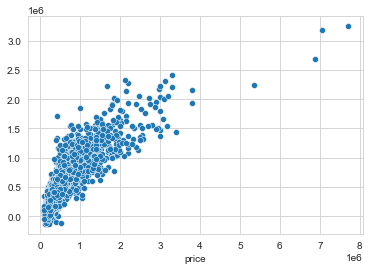

KNeighbors Regressor


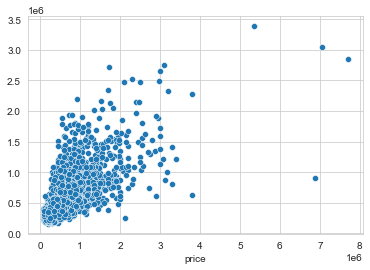

MLP Regressor


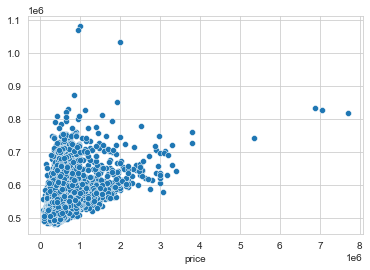

Polynomial Features


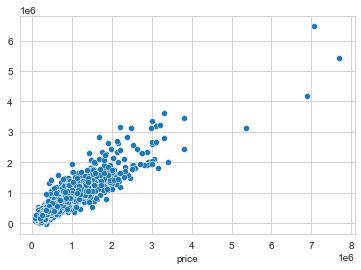

Decision Tree


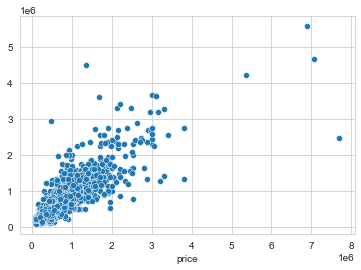

Random Forest


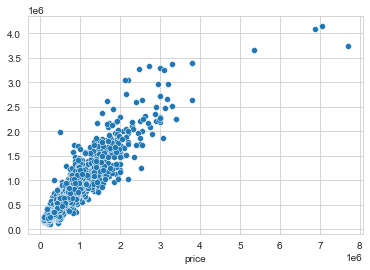

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name         mae           mse    root_mse     r2  \
5         Random Forest   70638.747  2.035548e+10  142672.622  0.861   
3   Polynomial Features   99959.059  2.594180e+10  161064.580  0.823   
4         Decision Tree   99409.008  3.733703e+10  193227.910  0.745   
0     Linear Regression  127040.944  4.613567e+10  214792.161  0.685   
1  KNeighbors Regressor  160910.547  7.547438e+10  274726.005  0.485   
2         MLP Regressor  223951.519  1.312620e+11  362301.004  0.104   

      adjr2    re  
5  0.860613  0.13  
3  0.822507  0.20  
4  0.744290  0.18  
0  0.684122  0.26  
1  0.483565  0.32  
2  0.101504  0.53

In [24]:
from sklearn.model_selection import train_test_split
X = data.drop(['price'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
model_evaluation(X_train, X_test, y_train, y_test)

error metrics for this attempt ('raw' data):

#Attempt 1: Log Transformation
We used the log transformation for all variables with high skewness (including the target).

**Getting a copy of the fresh dataset**

In [25]:
data_attempt_1 = data.copy()


**Log Transformation**

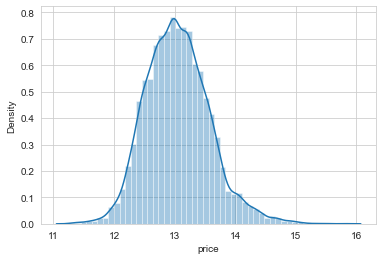

In [26]:
def log_transform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0 
      
      
# log transformation on target column 'price'
data_attempt_1['price'] = data_attempt_1['price'].apply(log_transform_clean)
sns.distplot(data_attempt_1['price']);
plt.show()

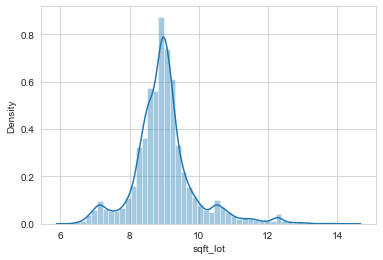

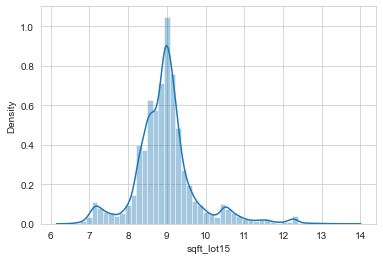

In [27]:
# log transformation on columns 'sqft_lot' and 'sqft_lot15'
data_attempt_1['sqft_lot'] = data_attempt_1['sqft_lot'].apply(log_transform_clean)
sns.distplot(data_attempt_1['sqft_lot']);
plt.show()

data_attempt_1['sqft_lot15'] = data_attempt_1['sqft_lot15'].apply(log_transform_clean)
sns.distplot(data_attempt_1['sqft_lot15']);
plt.show()

In [28]:
from sklearn.model_selection import train_test_split  

# dropping the target feature
X = data_attempt_1.drop(['price'], axis=1)
y = data_attempt_1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

Linear Regression


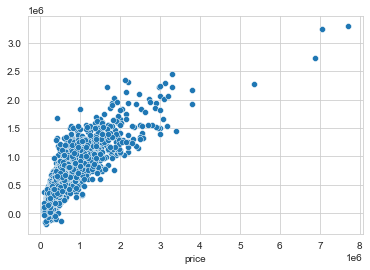

KNeighbors Regressor


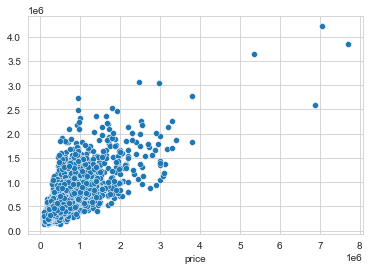

MLP Regressor


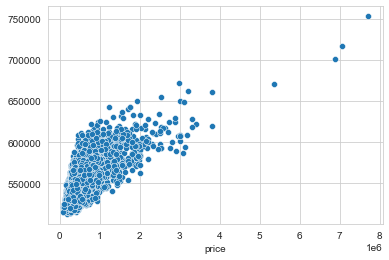

Polynomial Features


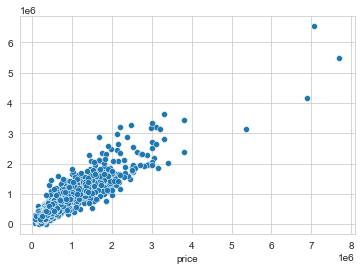

Decision Tree


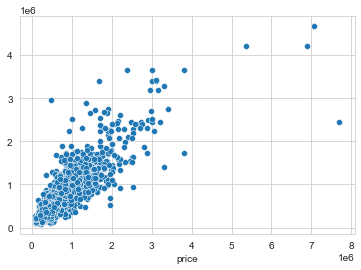

Random Forest


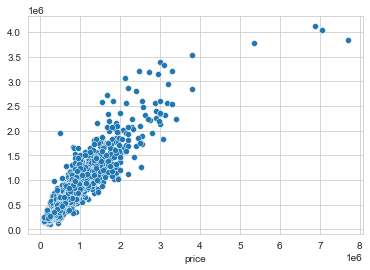

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name         mae           mse    root_mse     r2  \
5         Random Forest   70818.694  2.034409e+10  142632.714  0.861   
3   Polynomial Features   99115.792  2.596552e+10  161138.208  0.823   
4         Decision Tree   98613.475  3.513340e+10  187439.056  0.760   
0     Linear Regression  126465.011  4.572632e+10  213837.137  0.688   
1  KNeighbors Regressor  160796.783  6.684649e+10  258546.875  0.543   
2         MLP Regressor  226616.705  1.358479e+11  368575.531  0.072   

      adjr2    re  
5  0.860613  0.13  
3  0.822507  0.20  
4  0.759331  0.18  
0  0.687131  0.25  
1  0.541727  0.32  
2  0.069415  0.53

In [29]:
# undoing the log of the target
y_train = np.exp(y_train)
y_test = np.exp(y_test)

# model evaluation
model_evaluation(X_train, X_test, y_train, y_test)

# Attempt 2: drop lat and long

## Log & StandardScaler
- Logarithm transformation on columns sqft_lot and sqft_log15 and Standard Scaler on the rest of features. We also dropped lat and long columns for this attempt

**Creating a copy of the data set**

In [30]:
data_attempt_2 = data.copy()
data_attempt_2 = data_attempt_2.drop(['lat'], axis=1)
data_attempt_2 = data_attempt_2.drop(['long'], axis=1)


Linear Regression


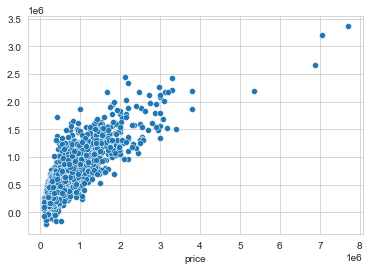

KNeighbors Regressor


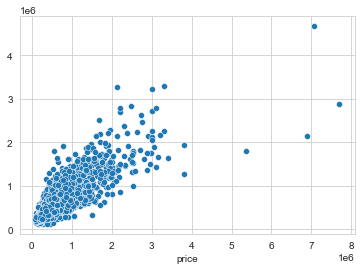

MLP Regressor


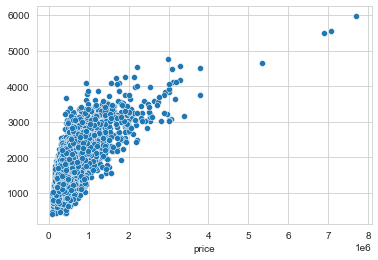

Polynomial Features


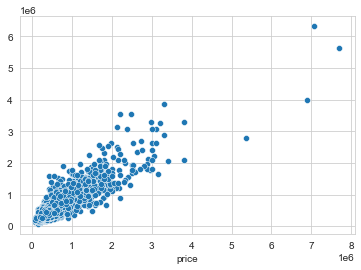

Decision Tree


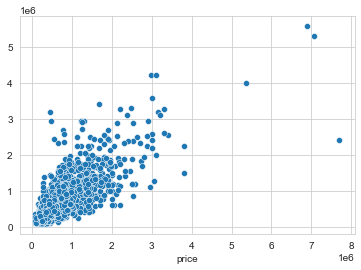

Random Forest


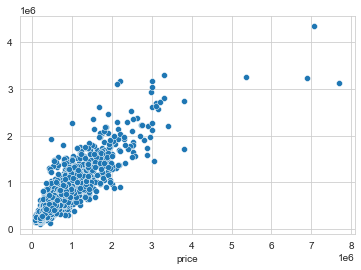

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name         mae           mse    root_mse     r2  \
5         Random Forest   89742.067  3.069461e+10  175198.760  0.790   
3   Polynomial Features  122271.993  3.565263e+10  188819.038  0.756   
1  KNeighbors Regressor  121771.793  4.613580e+10  214792.464  0.685   
0     Linear Regression  139799.597  5.185104e+10  227708.225  0.646   
4         Decision Tree  123888.622  5.340208e+10  231088.900  0.635   
2         MLP Regressor  532998.226  4.302010e+11  655897.084 -1.938   

      adjr2    re  
5  0.789480  0.17  
3  0.755396  0.25  
1  0.684220  0.24  
0  0.645124  0.29  
4  0.634096  0.23  
2 -1.945273  1.00

In [31]:
log_scale_model(data_attempt_2, 'price', ['sqft_lot','sqft_lot15'], 'StandardScaler')

## Log & Min Max Scaler
- We did the logarithmic transformation on the same columns, and applied Min Max Scaler. We also dropped lat and long columns

**Creating a copy of the data set**

In [32]:
data_attempt_2 = data.copy()
data_attempt_2 = data_attempt_2.drop(['lat'], axis=1)
data_attempt_2 = data_attempt_2.drop(['long'], axis=1)

Linear Regression


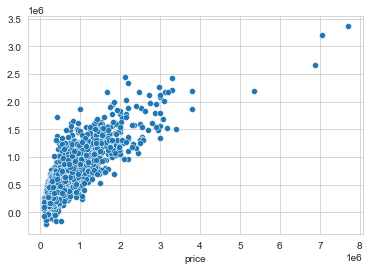

KNeighbors Regressor


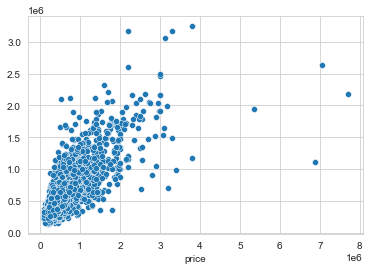

MLP Regressor


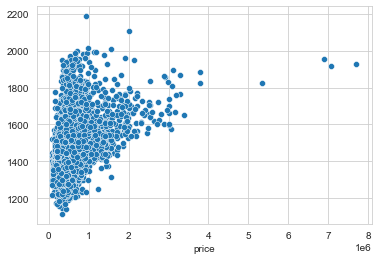

Polynomial Features


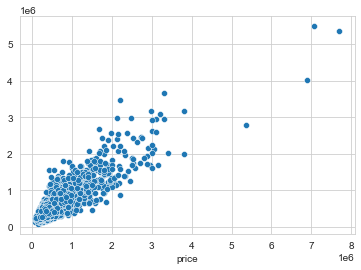

Decision Tree


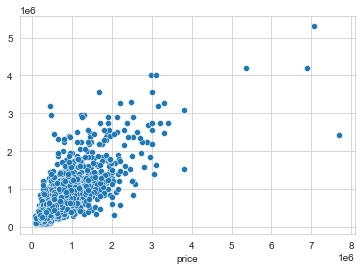

Random Forest


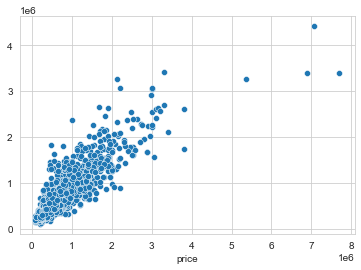

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name         mae           mse    root_mse     r2  \
5         Random Forest   89934.079  3.032546e+10  174142.078  0.793   
3   Polynomial Features  122431.108  3.597624e+10  189674.033  0.754   
0     Linear Regression  139799.597  5.185104e+10  227708.225  0.646   
4         Decision Tree  124063.114  5.361881e+10  231557.361  0.634   
1  KNeighbors Regressor  129313.849  5.706004e+10  238872.444  0.610   
2         MLP Regressor  533263.690  4.307480e+11  656313.964 -1.942   

      adjr2    re  
5  0.792488  0.17  
3  0.753391  0.26  
0  0.645124  0.29  
4  0.633094  0.23  
1  0.609035  0.26  
2 -1.949283  1.00

In [33]:
log_scale_model(data_attempt_2, 'price', ['sqft_lot','sqft_lot15'], 'MinMaxScaler')

## Log & Normalizer

- We did the logarithmic transformation on the same columns, and applied Normalizer. In this attempt we also dropped lat and long columns

**Creating a copy of the data set**

In [34]:
data_attempt_3 = data.copy()
data_attempt_3= data_attempt_3.drop(['lat'], axis=1)
data_attempt_3 = data_attempt_3.drop(['long'], axis=1)

Linear Regression


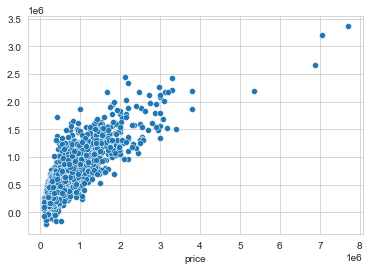

KNeighbors Regressor


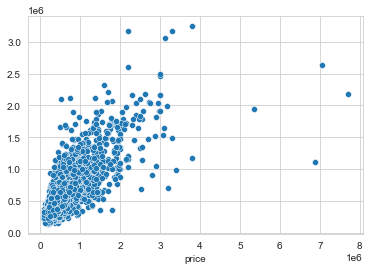

MLP Regressor


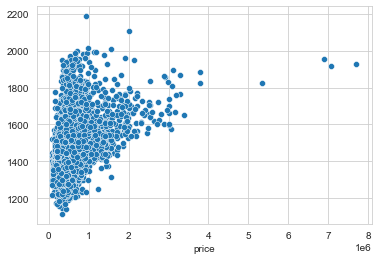

Polynomial Features


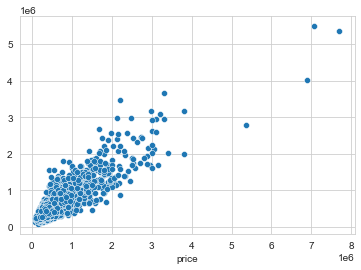

Decision Tree


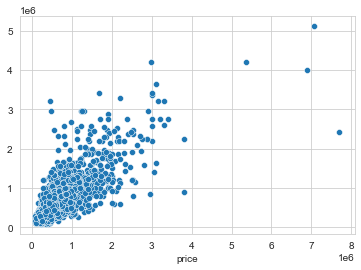

Random Forest


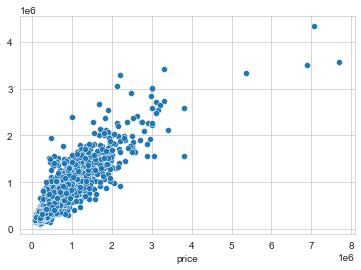

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name         mae           mse    root_mse     r2  \
5         Random Forest   89441.657  2.995237e+10  173067.523  0.795   
3   Polynomial Features  122431.108  3.597624e+10  189674.033  0.754   
0     Linear Regression  139799.597  5.185104e+10  227708.225  0.646   
4         Decision Tree  122886.836  5.373439e+10  231806.799  0.633   
1  KNeighbors Regressor  129313.849  5.706004e+10  238872.444  0.610   
2         MLP Regressor  533263.690  4.307480e+11  656313.964 -1.942   

      adjr2    re  
5  0.794492  0.17  
3  0.753391  0.26  
0  0.645124  0.29  
4  0.632091  0.23  
1  0.609035  0.26  
2 -1.949283  1.00

In [35]:
log_scale_model(data_attempt_3, 'price', ['sqft_lot','sqft_lot15'], 'MinMaxScaler')

> ...only tiny improvements of the model.

# Attempt 3: using location (lat/long) in the predictions
Another attempt, this time with removing ID duplicates and using latitude and longitude in our models to see if it improves our metrics



**Creating a copy of the fresh data set**

dropping duplicates in the 'ID' column and dropping it after


In [36]:
data_attempt_3 = pd.read_sql_query('SELECT * from house_price_data', engine)

data_attempt_3.shape

data_attempt_3 = data_attempt_3.drop_duplicates('id', keep='last')

data_attempt_3.shape

data_attempt_3 = data_attempt_3.drop(['id'], axis=1)

**Exploration of the data**

In [37]:
data_attempt_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21420 non-null  int64  
 1   bathrooms      21420 non-null  float64
 2   sqft_living    21420 non-null  int64  
 3   sqft_lot       21420 non-null  int64  
 4   floors         21420 non-null  float64
 5   waterfront     21420 non-null  int64  
 6   view           21420 non-null  int64  
 7   condition      21420 non-null  int64  
 8   grade          21420 non-null  int64  
 9   sqft_above     21420 non-null  int64  
 10  sqft_basement  21420 non-null  int64  
 11  yr_built       21420 non-null  int64  
 12  yr_renovated   21420 non-null  int64  
 13  zipcode        21420 non-null  int64  
 14  lat            21420 non-null  float64
 15  long           21420 non-null  float64
 16  sqft_living15  21420 non-null  int64  
 17  sqft_lot15     21420 non-null  int64  
 18  price 

In [38]:
data_attempt_3.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21420.000000  21420.000000  21420.000000  2.142000e+04  21420.000000   
mean       3.373950      2.316713   2083.132633  1.512804e+04      1.543978   
std        0.925405      0.863844    918.808412  4.153080e+04      0.567395   
min        1.000000      1.000000    370.000000  5.200000e+02      1.000000   
25%        3.000000      2.000000   1430.000000  5.040000e+03      1.000000   
50%        3.000000      2.000000   1920.000000  7.614000e+03      2.000000   
75%        4.000000      3.000000   2550.000000  1.069050e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      4.000000   

         waterfront          view     condition         grade    sqft_above  \
count  21420.000000  21420.000000  21420.000000  21420.000000  21420.000000   
mean       0.007610      0.235107      3.410784      7.662792   1791.170215   
std        0.086903      0.767165      0.650035      1.171971    828.692965   
min        0.000000      0.000000      1.000000      3.000000    370.000000   
25%        0.000000      0.000000      3.000000      7.000000   1200.000000   
50%        0.000000      0.000000      3.000000      7.000000   1560.000000   
75%        0.000000      0.000000      4.000000      8.000000   2220.000000   
max        1.000000      4.000000      5.000000     13.000000   9410.000000   

       sqft_basement      yr_built  yr_renovated      zipcode           lat  \
count   21420.000000  21420.000000  21420.000000  21420.00000  21420.000000   
mean      291.962418   1971.092997     84.793091  98077.87437     47.560197   
std       442.875502     29.387141    402.574626     53.47748      0.138589   
min         0.000000   1900.000000      0.000000  98001.00000     47.155900   
25%         0.000000   1952.000000      0.000000  98033.00000     47.471200   
50%         0.000000   1975.000000      0.000000  98065.00000     47.572100   
75%       560.000000   1997.000000      0.000000  98117.00000     47.678100   
max      4820.000000   2015.000000   2015.000000  98199.00000     47.777600   

               long  sqft_living15     sqft_lot15         price  
count  21420.000000   21420.000000   21420.000000  2.142000e+04  
mean    -122.213784    1988.384080   12775.718161  5.418614e+05  
std        0.140791     685.537057   27345.621867  3.675569e+05  
min     -122.519000     399.000000     651.000000  7.800000e+04  
25%     -122.328000    1490.000000    5100.000000  3.249500e+05  
50%     -122.230000    1840.000000    7620.000000  4.505500e+05  
75%     -122.125000    2370.000000   10086.250000  6.450000e+05  
max     -121.315000    6210.000000  871200.000000  7.700000e+06

**Splitting the data in continuous and discrete**

In [39]:
continuous_data = pd.DataFrame()
discrete_data = pd.DataFrame()

for i in data_attempt_3:
    if len(data_attempt_3[i].unique()) < 120:
        discrete_data[i] = data_attempt_3[i]
    else:
        continuous_data[i] = data_attempt_3[i]

In [40]:
for i in data_attempt_3.columns.tolist():         
    print(i, len(data[i].unique()))

bedrooms 11
bathrooms 8
sqft_living 1034
sqft_lot 9776
floors 4
waterfront 2
view 5
condition 5
grade 11
sqft_above 942
sqft_basement 306
yr_built 116
yr_renovated 70
zipcode 70
lat 5033
long 751
sqft_living15 777
sqft_lot15 8682
price 3622


sqft_living


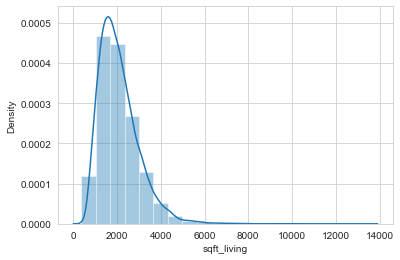

sqft_lot


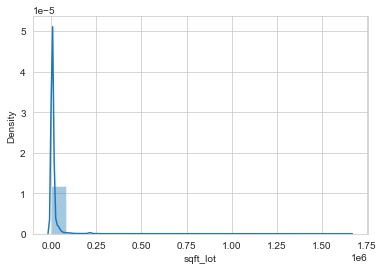

sqft_above


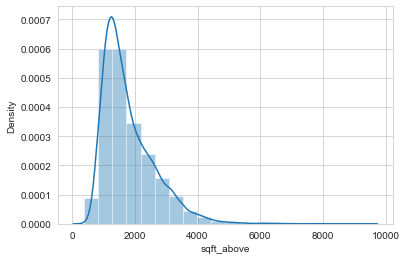

sqft_basement


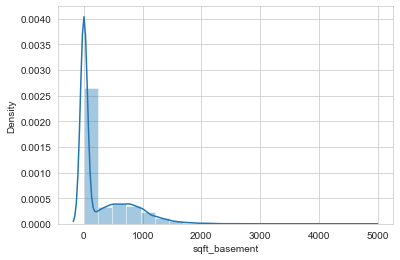

lat


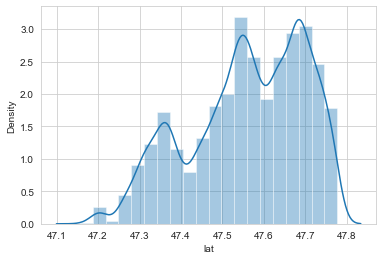

long


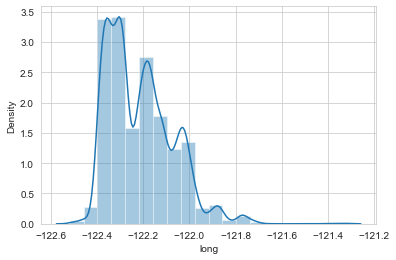

sqft_living15


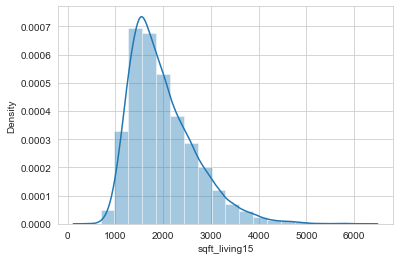

sqft_lot15


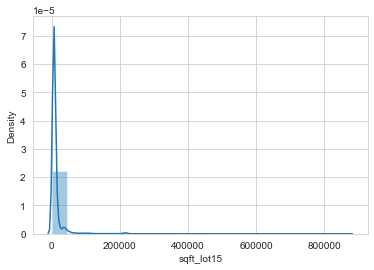

price


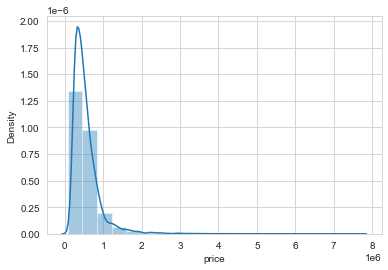

In [41]:
for i in continuous_data:
    print(i)
    sns.distplot(data_attempt_3[i], bins=20)
    plt.show()

**Outliers check**

bedrooms
The upper whisker is at: 5.50
The number of points outside the upper whisker is:  327
Percentage from total 1.53 %


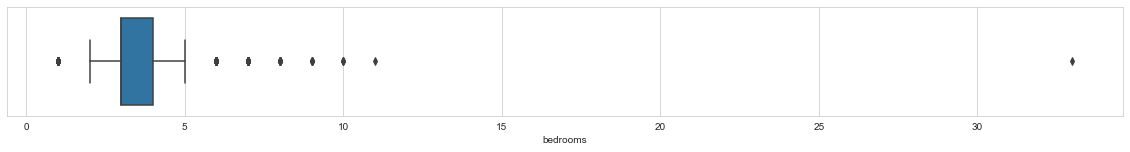


bathrooms
The upper whisker is at: 4.50
The number of points outside the upper whisker is:  186
Percentage from total 0.87 %


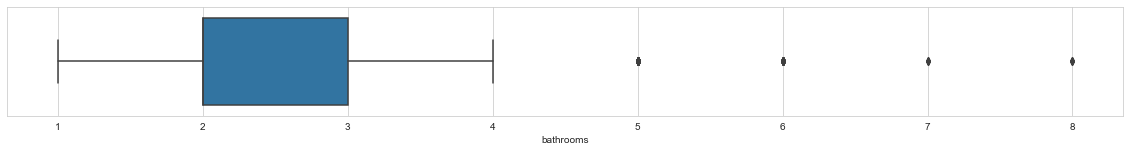


sqft_living
The upper whisker is at: 4230.00
The number of points outside the upper whisker is:  568
Percentage from total 2.65 %


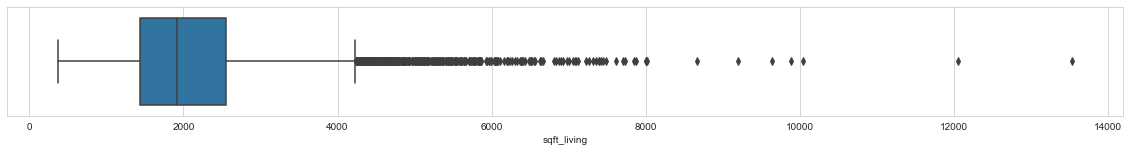


sqft_lot
The upper whisker is at: 19166.25
The number of points outside the upper whisker is:  2406
Percentage from total 11.23 %


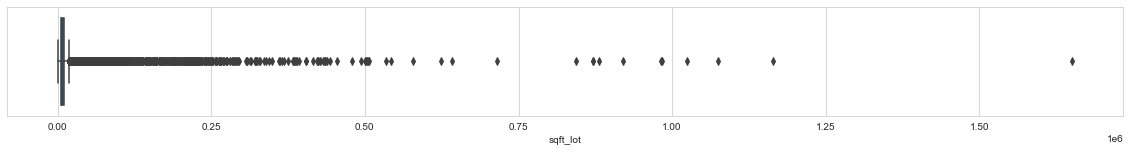


floors
The upper whisker is at: 3.50
The number of points outside the upper whisker is:  7
Percentage from total 0.03 %


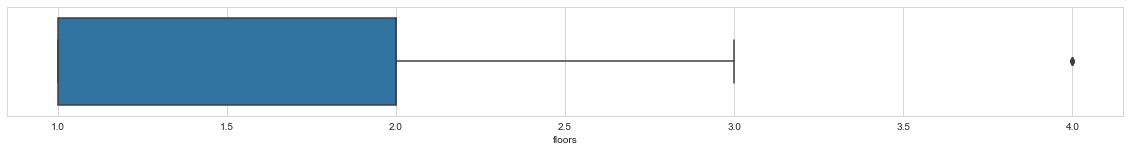


waterfront
The upper whisker is at: 0.00
The number of points outside the upper whisker is:  163
Percentage from total 0.76 %


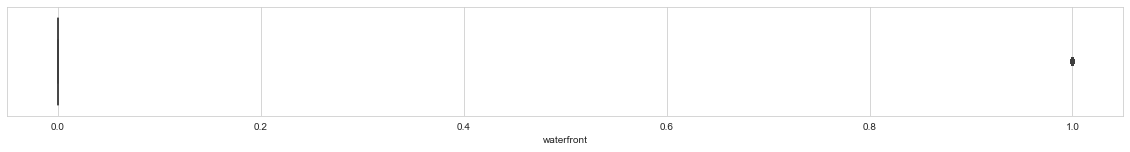


view
The upper whisker is at: 0.00
The number of points outside the upper whisker is:  2114
Percentage from total 9.87 %


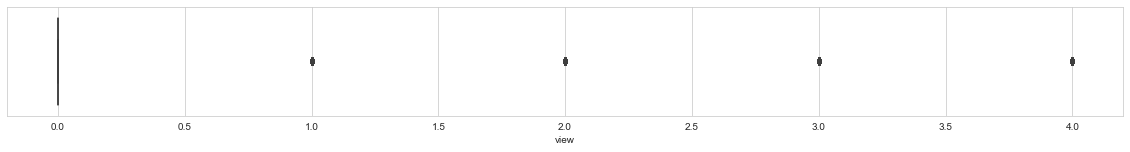


condition has no outliers

grade
The upper whisker is at: 9.50
The number of points outside the upper whisker is:  1627
Percentage from total 7.6 %


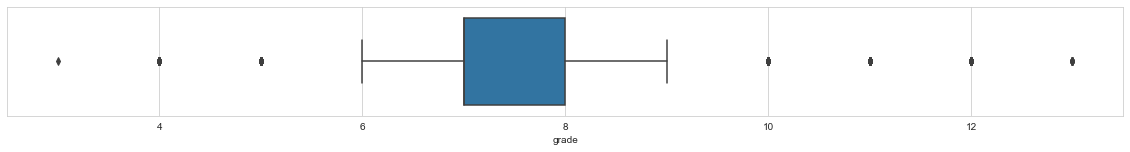


sqft_above
The upper whisker is at: 3750.00
The number of points outside the upper whisker is:  600
Percentage from total 2.8 %


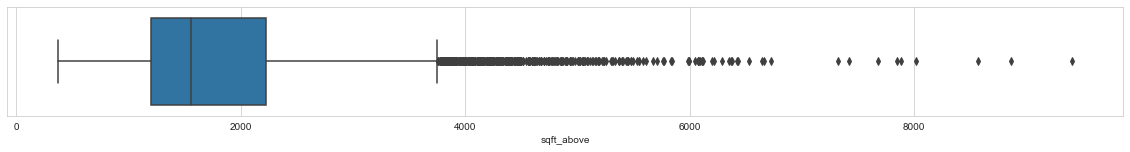


sqft_basement
The upper whisker is at: 1400.00
The number of points outside the upper whisker is:  493
Percentage from total 2.3 %


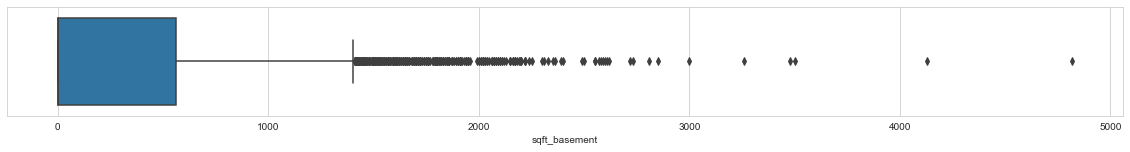


yr_built has no outliers

yr_renovated
The upper whisker is at: 0.00
The number of points outside the upper whisker is:  910
Percentage from total 4.25 %


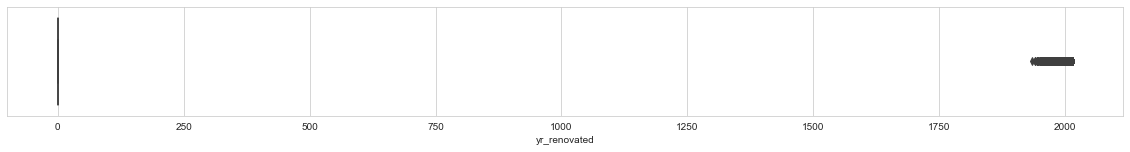


zipcode has no outliers

lat has no outliers

long
The upper whisker is at: -121.82
The number of points outside the upper whisker is:  252
Percentage from total 1.18 %


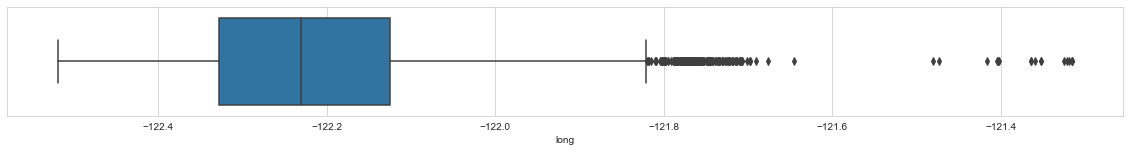


sqft_living15
The upper whisker is at: 3690.00
The number of points outside the upper whisker is:  503
Percentage from total 2.35 %


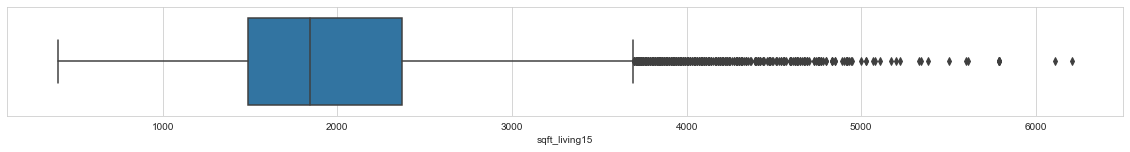


sqft_lot15
The upper whisker is at: 17565.62
The number of points outside the upper whisker is:  2174
Percentage from total 10.15 %


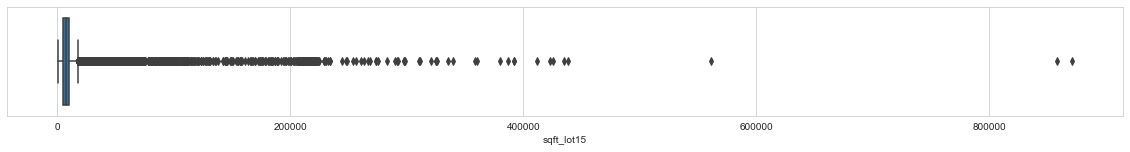


price
The upper whisker is at: 1125075.00
The number of points outside the upper whisker is:  1152
Percentage from total 5.38 %


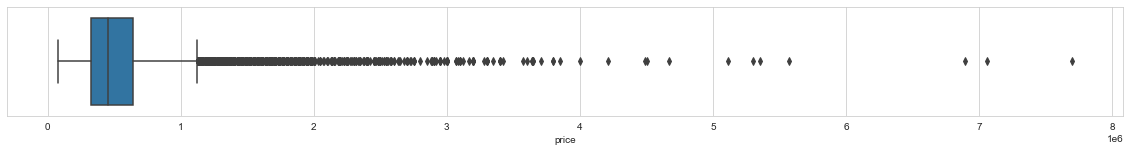

name   perc
3        sqft_lot  11.23
17     sqft_lot15  10.15
6            view   9.87
8           grade   7.60
18          price   5.38
12   yr_renovated   4.25
9      sqft_above   2.80
2     sqft_living   2.65
16  sqft_living15   2.35
10  sqft_basement   2.30
0        bedrooms   1.53
15           long   1.18
1       bathrooms   0.87
5      waterfront   0.76
4          floors   0.03
7       condition   0.00
11       yr_built   0.00
13        zipcode   0.00
14            lat   0.00

In [42]:
outliers_list = pd.DataFrame (columns = ['name', 'perc'])
def get_outliers(data_attempt_3):
    outliers_list = pd.DataFrame (columns = ['name', 'perc'])
    for i in data_attempt_3:  
        iqr = np.percentile(data_attempt_3[i],75) - np.percentile(data_attempt_3[i],25)
        upper_limit = np.percentile(data_attempt_3[i],75) + 1.5*iqr    
        outliers = data_attempt_3[data_attempt_3[i] > upper_limit].index.tolist()       
        
        
        if len(outliers) > 0:
            print (i)
            print("The upper whisker is at: %4.2f" % upper_limit)
            print("The number of points outside the upper whisker is: ",len(outliers))
            print("Percentage from total", round(len(outliers)*100/len(data_attempt_3[i]),2), '%')
            ax, fig = plt.subplots(figsize = (20,2)) #I added boxplots to vizualize the outliers - feel free to remove if you don't find it useful (Josie)
            sns.boxplot(x=i, data=data_attempt_3)
            plt.show()
        else:
            print (i, 'has no outliers')
        print()
        
        perc = round(len(outliers)*100/len(data_attempt_3[i]),2)
        outliers_list = outliers_list.append({'name': i, 'perc': perc}, ignore_index=True)
    outliers_list = outliers_list.sort_values(by=['perc'],ascending=False)
    return outliers_list
        

get_outliers(data_attempt_3)


**Getting the Skewness, kurtosis and Q-Q plot of the new dataset**

In [43]:
from scipy.stats import skew
continuous_data.apply(skew)

sqft_living       1.472599
sqft_lot         13.055338
sqft_above        1.444900
sqft_basement     1.575679
lat              -0.488387
long              0.881693
sqft_living15     1.104454
sqft_lot15        9.512378
price             4.035096
dtype: float64

In [44]:
from scipy.stats import kurtosis
for i in continuous_data:
    print(i, '--------', kurtosis(continuous_data[i]))

sqft_living -------- 5.256679581250403
sqft_lot -------- 284.4331891514484
sqft_above -------- 3.3972630878338492
sqft_basement -------- 2.7072723202393005
lat -------- -0.6731890493803365
long -------- 1.0476438511081492
sqft_living15 -------- 1.5872937126855096
sqft_lot15 -------- 150.920930233772
price -------- 34.67212942974765


Q-Q plot for variable: sqft_living


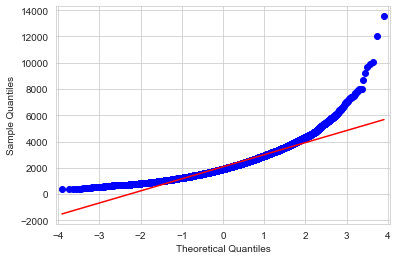

Q-Q plot for variable: sqft_lot


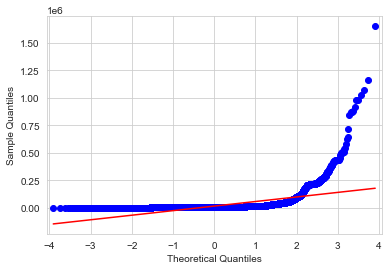

Q-Q plot for variable: sqft_above


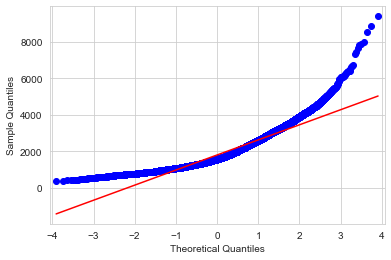

Q-Q plot for variable: sqft_basement


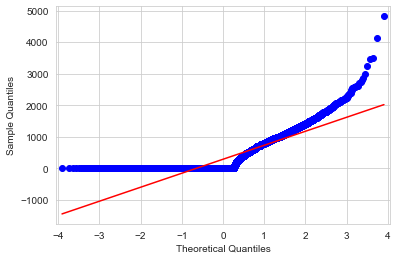

Q-Q plot for variable: lat


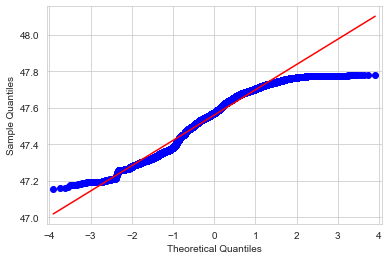

Q-Q plot for variable: long


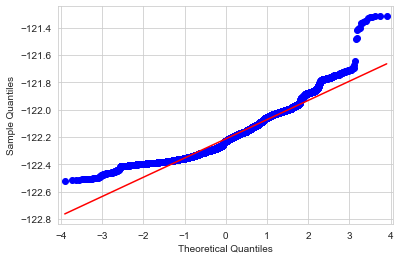

Q-Q plot for variable: sqft_living15


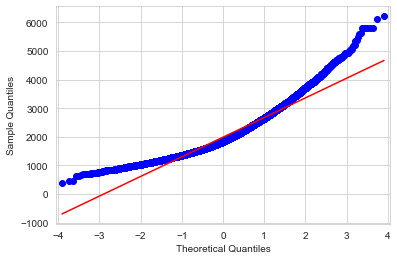

Q-Q plot for variable: sqft_lot15


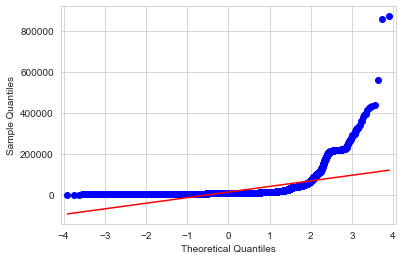

Q-Q plot for variable: price


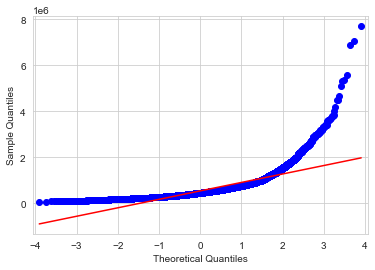

In [45]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
 
cols = list(continuous_data.columns)
for col in cols:
    print('Q-Q plot for variable:', col)
    qqplot(continuous_data[col], line='s')
    plt.show()

**Cleaning the data**

In [46]:
data_attempt_3['bedrooms'] = data_attempt_3['bedrooms'].replace(33, 3)

**Checking the correlation matrix**

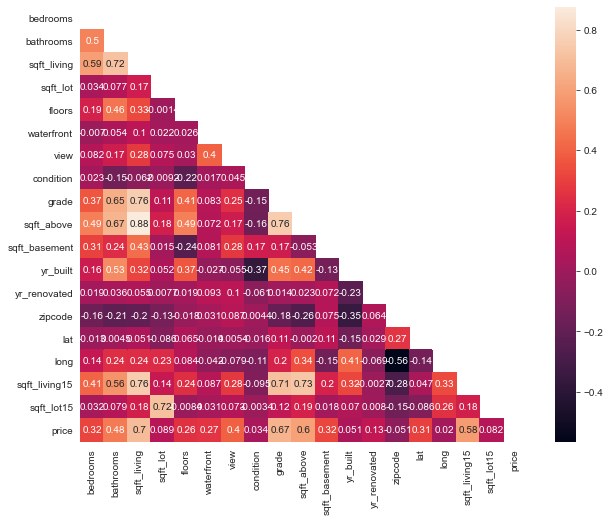

In [47]:
corr_data = data_attempt_3
 
correlations_matrix = corr_data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show() # Half correlation matrix

**Data** **transformation**

## Log & Standard Scaler

Linear Regression


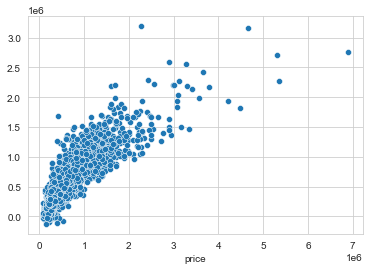

KNeighbors Regressor


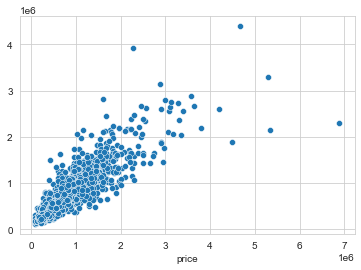

MLP Regressor


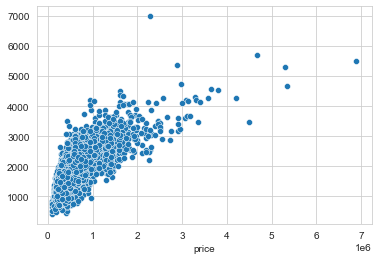

Polynomial Features


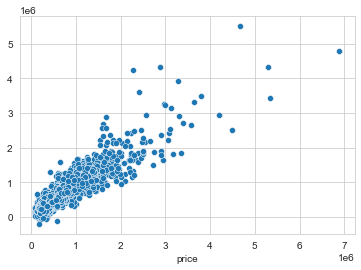

Decision Tree


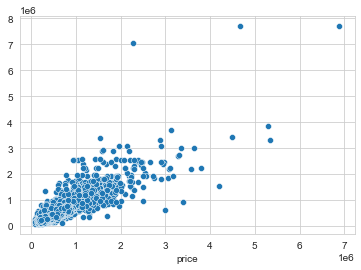

Random Forest


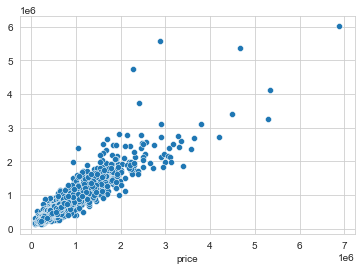

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name         mae           mse    root_mse     r2  \
5         Random Forest   71395.925  1.923915e+10  138705.265  0.869   
3   Polynomial Features  101459.432  2.683499e+10  163813.898  0.817   
1  KNeighbors Regressor   92713.742  3.185535e+10  178480.679  0.783   
4         Decision Tree  100625.365  3.900013e+10  197484.500  0.734   
0     Linear Regression  127058.863  4.358879e+10  208779.287  0.702   
2         MLP Regressor  545506.940  4.437455e+11  666142.235 -2.029   

      adjr2    re  
5  0.868632  0.13  
3  0.816486  0.20  
1  0.782390  0.16  
4  0.733253  0.18  
0  0.701163  0.25  
2 -2.037510  1.00

In [48]:
log_scale_model(data_attempt_3, 'price', ['sqft_lot','sqft_lot15'], 'StandardScaler')

## Log & Min Max Scaler

Linear Regression


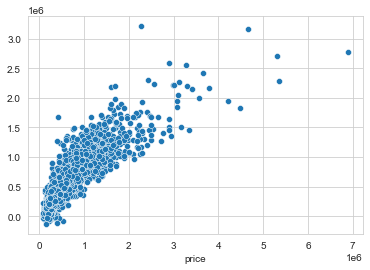

KNeighbors Regressor


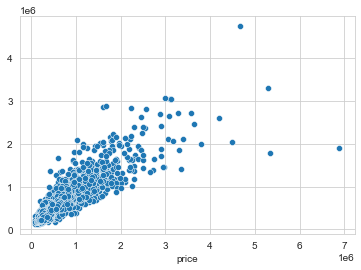

MLP Regressor


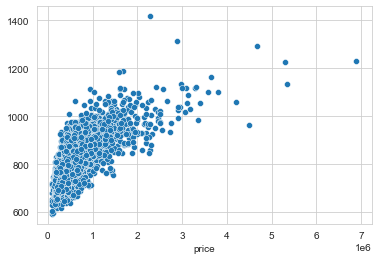

Polynomial Features


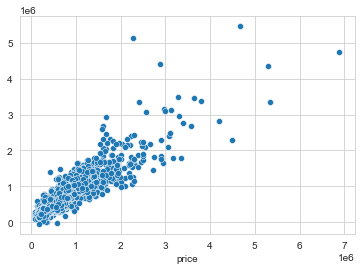

Decision Tree


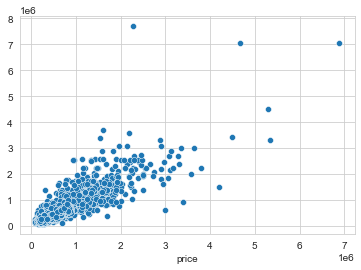

Random Forest


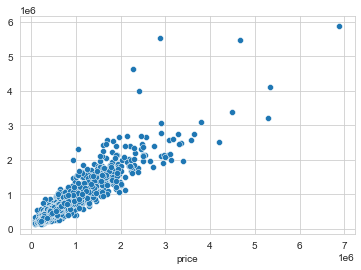

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name         mae           mse    root_mse     r2  \
5         Random Forest   70824.618  1.892116e+10  137554.205  0.871   
3   Polynomial Features  101748.391  2.821301e+10  167967.280  0.807   
1  KNeighbors Regressor   89850.263  3.290263e+10  181390.834  0.775   
4         Decision Tree  100373.427  3.949985e+10  198745.698  0.730   
0     Linear Regression  126878.728  4.349632e+10  208557.716  0.703   
2         MLP Regressor  546451.929  4.450667e+11  667133.211 -2.038   

      adjr2    re  
5  0.870638  0.13  
3  0.806458  0.20  
1  0.774368  0.16  
4  0.729241  0.18  
0  0.702166  0.25  
2 -2.046535  1.00

In [49]:
log_scale_model(data_attempt_3, 'price', ['sqft_lot','sqft_lot15'], 'MinMaxScaler')

## Log & Normalizer

Linear Regression


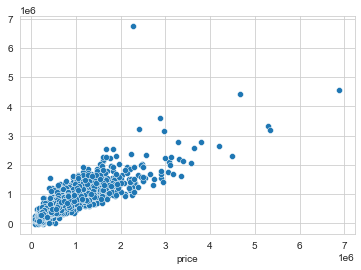

KNeighbors Regressor


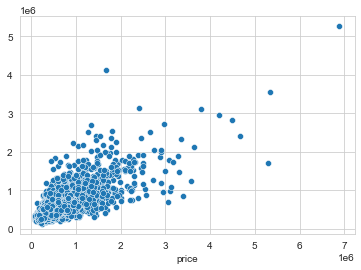

MLP Regressor


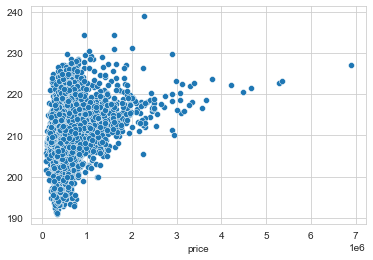

Polynomial Features


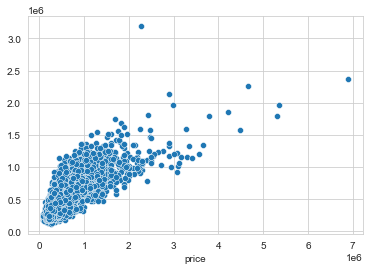

Decision Tree


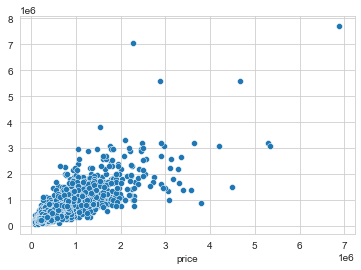

Random Forest


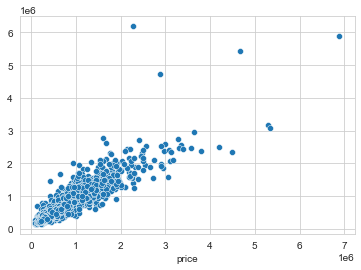

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name         mae           mse    root_mse     r2  \
5         Random Forest   82445.336  2.498577e+10  158068.887  0.829   
0     Linear Regression  120934.838  4.062452e+10  201555.246  0.723   
4         Decision Tree  118109.891  5.174763e+10  227481.055  0.647   
1  KNeighbors Regressor  158212.342  6.363190e+10  252253.638  0.566   
3   Polynomial Features  167150.986  7.224388e+10  268782.212  0.507   
2         MLP Regressor  547052.118  4.457631e+11  667654.892 -2.043   

      adjr2    re  
5  0.828520  0.15  
0  0.722222  0.23  
4  0.646008  0.21  
1  0.564781  0.31  
3  0.505615  0.34  
2 -2.051549  1.00

In [50]:
log_scale_model(data_attempt_3, 'price', ['sqft_lot','sqft_lot15'], 'Normalizer')

# Attempt 4: Location & Distance, Log & StandardScaler
We used the latitude and longitude to generate the distance (in miles) to the nearest major city Seattle to check if the distance is correlated to our target.

**Creating a copy of the data set**

In [51]:
data_attempt_4 = data.copy()

**Checking if the distance to Seattle affects the prices**

In [52]:
from haversine import haversine_vector, Unit,haversine
seattle = tuple([47.608013, -122.335167])
data_attempt_4['location'] = tuple(zip(data_attempt_4['lat'], data_attempt_4['long']))

dist_seattle = []
for i in data_attempt_4['location']:
    dist_seattle. append(haversine((seattle),(i),unit = 'mi'))

data_attempt_4['distance_to_seattle'] = pd.Series(dist_seattle)
data_attempt_4 = data_attempt_4.drop(['lat','long', 'location'],axis=1)
data_attempt_4.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3        1.0         1180      5650     1.0           0     0   
1         3        2.0         2570      7242     2.0           0     0   
2         2        1.0          770     10000     1.0           0     0   
3         4        3.0         1960      5000     1.0           0     0   
4         3        2.0         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15   price  distance_to_seattle  
0    98178           1340        5650  221900             7.617592  
1    98125           1690        7639  538000             7.842822  
2    98028           2720        8062  180000            10.155421  
3    98136           1360        5000  604000             6.601563  
4    98074           1800        7503  510000            13.529254

Linear Regression


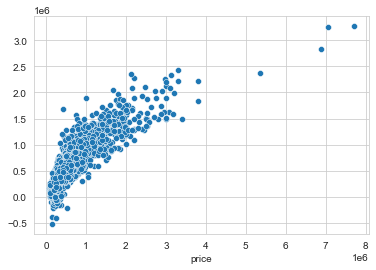

KNeighbors Regressor


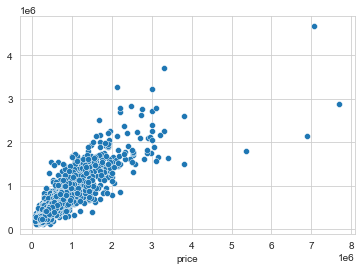

MLP Regressor


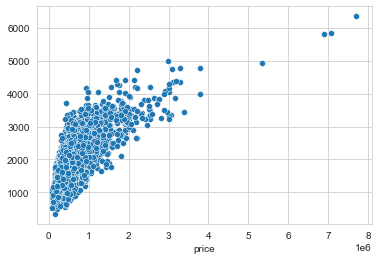

Polynomial Features


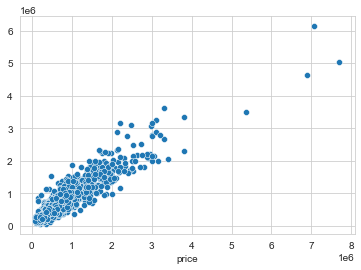

Decision Tree


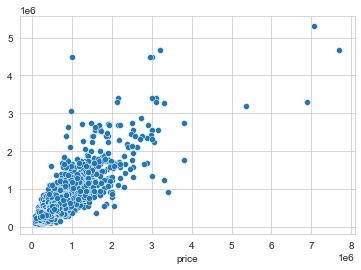

Random Forest


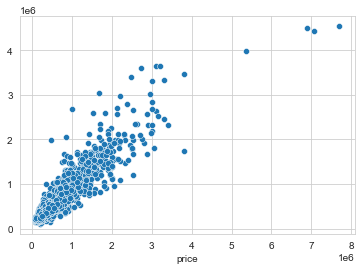

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name         mae           mse    root_mse     r2  \
5         Random Forest   76619.765  2.188352e+10  147930.787  0.851   
3   Polynomial Features   98250.596  2.336125e+10  152843.880  0.840   
1  KNeighbors Regressor  101402.250  3.689371e+10  192077.349  0.748   
4         Decision Tree  108389.510  4.168195e+10  204161.583  0.715   
0     Linear Regression  124734.177  4.327725e+10  208031.849  0.704   
2         MLP Regressor  532911.313  4.300769e+11  655802.449 -1.937   

      adjr2    re  
5  0.850608  0.15  
3  0.839579  0.20  
1  0.747337  0.19  
4  0.714250  0.20  
0  0.703221  0.26  
2 -1.944727  1.00

In [53]:
log_scale_model(data_attempt_4, 'price', ['sqft_lot','sqft_lot15'], 'StandardScaler')

> ...improvement of KNeighbors Regressor; the others are stable or even decrease a tiny bit in performance

# Attempt 5: Drop 'sqft_above', Log & StandardScaler
We dropped the column 'sqft_above' in this attempt because it has the highest correlation outside of the target and also has a high-ish correlation with the target (0.61).

**Getting a copy of the fresh dataset**

In [54]:
data_attempt_5 = data.copy()
data_attempt_5 = data_attempt_5.drop(['sqft_above'],axis=1)
data_attempt_5.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3        1.0         1180      5650     1.0           0     0   
1         3        2.0         2570      7242     2.0           0     0   
2         2        1.0          770     10000     1.0           0     0   
3         4        3.0         1960      5000     1.0           0     0   
4         3        2.0         1680      8080     1.0           0     0   

   condition  grade  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0          3      7              0      1955             0    98178  47.5112   
1          3      7            400      1951          1991    98125  47.7210   
2          3      6              0      1933             0    98028  47.7379   
3          5      7            910      1965             0    98136  47.5208   
4          3      8              0      1987             0    98074  47.6168   

      long  sqft_living15  sqft_lot15   price  
0 -122.257           1340        5650  221900  
1 -122.319           1690        7639  538000  
2 -122.233           2720        8062  180000  
3 -122.393           1360        5000  604000  
4 -122.045           1800        7503  510000

Linear Regression


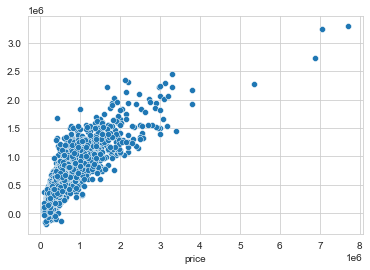

KNeighbors Regressor


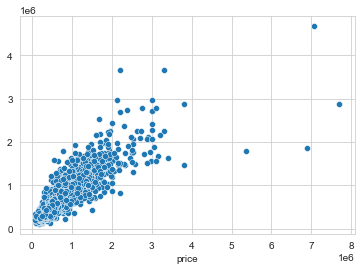

MLP Regressor


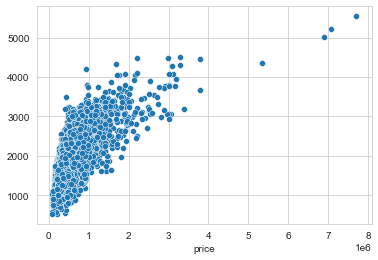

Polynomial Features


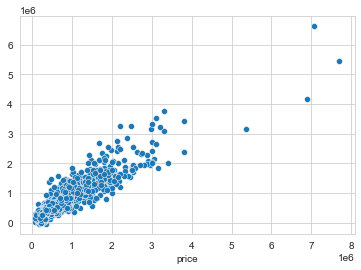

Decision Tree


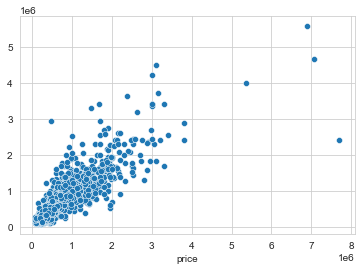

Random Forest


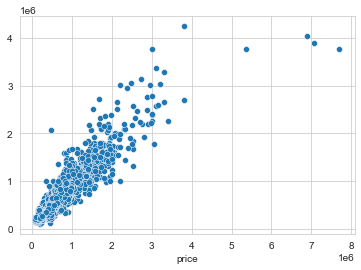

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name         mae           mse    root_mse     r2  \
5         Random Forest   70951.347  2.068903e+10  143836.816  0.859   
3   Polynomial Features   99952.540  2.563077e+10  160096.140  0.825   
1  KNeighbors Regressor   90779.572  3.513846e+10  187452.564  0.760   
4         Decision Tree   99347.381  3.566034e+10  188839.460  0.756   
0     Linear Regression  126465.011  4.572632e+10  213837.137  0.688   
2         MLP Regressor  532922.064  4.301283e+11  655841.704 -1.938   

      adjr2    re  
5  0.858629  0.13  
3  0.824540  0.20  
1  0.759369  0.17  
4  0.755358  0.18  
0  0.687179  0.25  
2 -1.945729  1.00

In [55]:
log_scale_model(data_attempt_5, 'price', ['sqft_lot','sqft_lot15'], 'StandardScaler')

> ...no significant changes.

# Attempt 6: Group 'yr_renovated', Log & StandardScaler
We grouped the column 'yr_renovated' into 0 (=not renovated) and 1 (=renovated) to see if this changes our prediction.

**Getting a copy of the fresh dataset**

In [56]:
data_attempt_6 = data.copy()

**Grouping the colum 'yr_renovated'**

In [57]:

renovation = []

for x in data_attempt_6['yr_renovated']:
    if x == 0:
        renovation.append(0)
    else:
        renovation.append(1)


data_attempt_6['renovation'] = renovation
data_attempt_6 = data_attempt_6.drop(['yr_renovated'],axis=1)
data_attempt_6.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3        1.0         1180      5650     1.0           0     0   
1         3        2.0         2570      7242     2.0           0     0   
2         2        1.0          770     10000     1.0           0     0   
3         4        3.0         1960      5000     1.0           0     0   
4         3        2.0         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  zipcode      lat  \
0          3      7        1180              0      1955    98178  47.5112   
1          3      7        2170            400      1951    98125  47.7210   
2          3      6         770              0      1933    98028  47.7379   
3          5      7        1050            910      1965    98136  47.5208   
4          3      8        1680              0      1987    98074  47.6168   

      long  sqft_living15  sqft_lot15   price  renovation  
0 -122.257           1340        5650  221900           0  
1 -122.319           1690        7639  538000           1  
2 -122.233           2720        8062  180000           0  
3 -122.393           1360        5000  604000           0  
4 -122.045           1800        7503  510000           0

Linear Regression


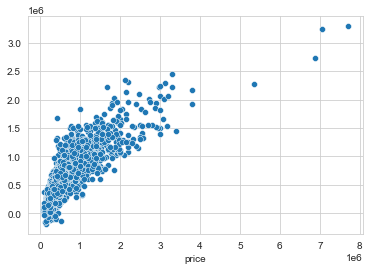

KNeighbors Regressor


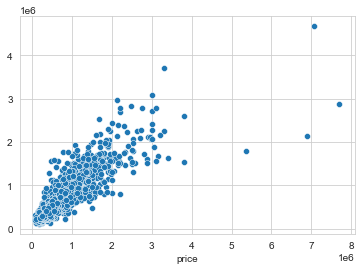

MLP Regressor


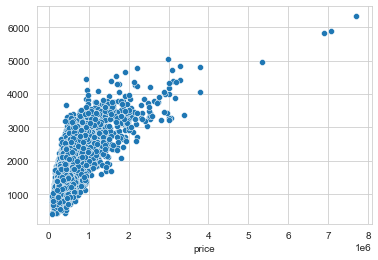

Polynomial Features


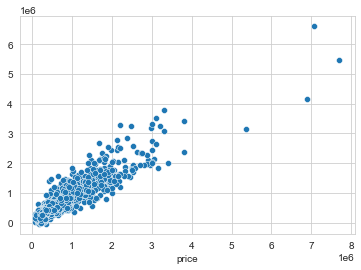

Decision Tree


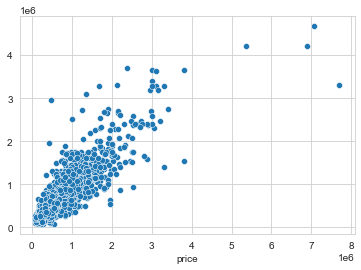

Random Forest


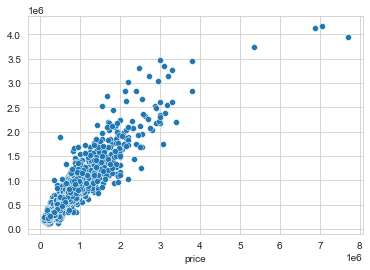

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name         mae           mse    root_mse     r2  \
5         Random Forest   70786.453  2.006992e+10  141668.336  0.863   
3   Polynomial Features  100021.075  2.565137e+10  160160.449  0.825   
1  KNeighbors Regressor   89183.157  3.384168e+10  183961.084  0.769   
4         Decision Tree   99203.119  3.432456e+10  185268.884  0.766   
0     Linear Regression  126470.734  4.572956e+10  213844.718  0.688   
2         MLP Regressor  532893.528  4.300535e+11  655784.620 -1.937   

      adjr2    re  
5  0.862618  0.13  
3  0.824512  0.20  
1  0.768356  0.16  
4  0.765348  0.19  
0  0.687131  0.25  
2 -1.945182  1.00

In [58]:
log_scale_model(data_attempt_6, 'price', ['sqft_lot','sqft_lot15'], 'StandardScaler')

> ...no significant changes.

# Attempt 7: Get 'city', remove 'zipcode' instead, Log & StandardScaler

**Getting a fresh copy of the dataset**

In [59]:
data_attempt_7 = data.copy()


**Turning the zipcode into a city name and addint it as a new column**

In [60]:
from uszipcode import Zipcode,SearchEngine

def get_city_name(x):
    search = SearchEngine(simple_zipcode=True)
    zipcode=search.by_zipcode(x)
    return zipcode.major_city

data_attempt_7['city'] = list(map(get_city_name, data_attempt_7['zipcode']))

In [61]:
data_attempt_7['city'].value_counts()

Seattle          8973
Renton           1597
Bellevue         1407
Kent             1201
Kirkland          977
Redmond           977
Auburn            911
Sammamish         800
Federal Way       779
Issaquah          733
Maple Valley      589
Woodinville       471
Snoqualmie        308
Kenmore           283
Mercer Island     282
Enumclaw          233
North Bend        220
Bothell           195
Duvall            190
Carnation         124
Vashon            117
Black Diamond     100
Fall City          80
Medina             50
Name: city, dtype: int64

In [62]:
data_attempt_7 = data_attempt_7.drop(['zipcode'],axis=1)
data_attempt_7.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3        1.0         1180      5650     1.0           0     0   
1         3        2.0         2570      7242     2.0           0     0   
2         2        1.0          770     10000     1.0           0     0   
3         4        3.0         1960      5000     1.0           0     0   
4         3        2.0         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

       lat     long  sqft_living15  sqft_lot15   price       city  
0  47.5112 -122.257           1340        5650  221900    Seattle  
1  47.7210 -122.319           1690        7639  538000    Seattle  
2  47.7379 -122.233           2720        8062  180000    Kenmore  
3  47.5208 -122.393           1360        5000  604000    Seattle  
4  47.6168 -122.045           1800        7503  510000  Sammamish

In [63]:
dummy = pd.get_dummies(data=data_attempt_7[['city']], columns=['city'],drop_first=True)

In [64]:
rest_ = data_attempt_7.drop(['city'], axis=1)
data_attempt_7 = pd.concat([dummy, rest_], axis=1)
data_attempt_7.head()

city_Bellevue  city_Black Diamond  city_Bothell  city_Carnation  \
0              0                   0             0               0   
1              0                   0             0               0   
2              0                   0             0               0   
3              0                   0             0               0   
4              0                   0             0               0   

   city_Duvall  city_Enumclaw  city_Fall City  city_Federal Way  \
0            0              0               0                 0   
1            0              0               0                 0   
2            0              0               0                 0   
3            0              0               0                 0   
4            0              0               0                 0   

   city_Issaquah  city_Kenmore  city_Kent  city_Kirkland  city_Maple Valley  \
0              0             0          0              0                  0   
1              0             0          0              0                  0   
2              0             1          0              0                  0   
3              0             0          0              0                  0   
4              0             0          0              0                  0   

   city_Medina  city_Mercer Island  city_North Bend  city_Redmond  \
0            0                   0                0             0   
1            0                   0                0             0   
2            0                   0                0             0   
3            0                   0                0             0   
4            0                   0                0             0   

   city_Renton  city_Sammamish  city_Seattle  city_Snoqualmie  city_Vashon  \
0            0               0             1                0            0   
1            0               0             1                0            0   
2            0               0             0                0            0   
3            0               0             1                0            0   
4            0               1             0                0            0   

   city_Woodinville  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0                 0         3        1.0         1180      5650     1.0   
1                 0         3        2.0         2570      7242     2.0   
2                 0         2        1.0          770     10000     1.0   
3                 0         4        3.0         1960      5000     1.0   
4                 0         3        2.0         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated      lat     long  sqft_living15  sqft_lot15   price  
0             0  47.5112 -122.257           1340        5650  221900  
1          1991  47.7210 -122.319           1690        7639  538000  
2             0  47.7379 -122.233           2720        8062  180000  
3             0  47.5208 -122.393           1360        5000  604000  
4             0  47.6168 -122.045           1800        7503  510000

Linear Regression


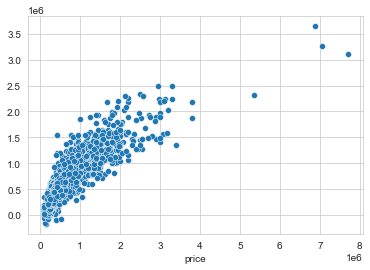

KNeighbors Regressor


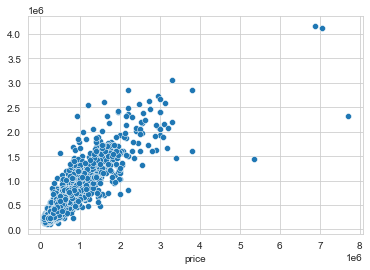

MLP Regressor


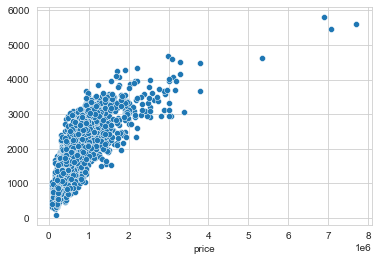

Polynomial Features


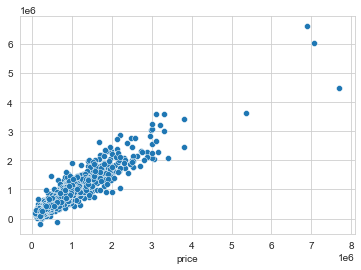

Decision Tree


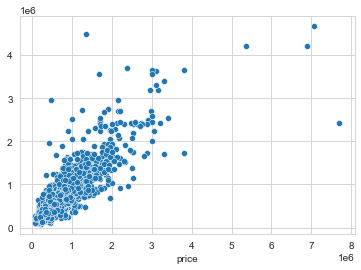

Random Forest


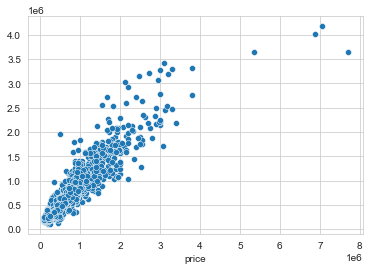

Random Forest has the lowest Mean Absolute Error
Polynomial Features has the lowest Mean Squared Error
Polynomial Features has the lowest Rooted Mean Squared Error
Polynomial Features has the highest R2
Polynomial Features has the highest Adjusted R2
Random Forest has the lowest Relative Error


name         mae           mse    root_mse     r2  \
3   Polynomial Features   80321.347  1.840834e+10  135677.338  0.874   
5         Random Forest   70829.403  2.059655e+10  143514.999  0.859   
1  KNeighbors Regressor   87490.051  3.234126e+10  179836.762  0.779   
4         Decision Tree   98261.241  3.602642e+10  189806.281  0.754   
0     Linear Regression  116205.900  3.959140e+10  198975.890  0.730   
2         MLP Regressor  533097.693  4.302510e+11  655935.179 -1.939   

      adjr2    re  
3  0.873217  0.16  
5  0.858124  0.13  
1  0.777627  0.16  
4  0.752472  0.18  
0  0.728323  0.24  
2 -1.957257  1.00

In [65]:
log_scale_model(data_attempt_7, 'price', ['sqft_lot','sqft_lot15'], 'StandardScaler')

> ...this improved all models apart from MLP Regressor.

# Attempt 8: Bins, Standard Scaler, MinMax Scaler and Normalizer

**Getting a fresh copy on the dataset**

In [66]:
data_attempt_8 = data.copy()

In [67]:
data_attempt_8.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21597.000000  21597.000000  21597.000000  2.159700e+04  21597.000000   
mean       3.371811      2.313655   2080.321850  1.509941e+04      1.542205   
std        0.904096      0.864160    918.106125  4.141264e+04      0.567159   
min        1.000000      1.000000    370.000000  5.200000e+02      1.000000   
25%        3.000000      2.000000   1430.000000  5.040000e+03      1.000000   
50%        3.000000      2.000000   1910.000000  7.618000e+03      2.000000   
75%        4.000000      3.000000   2550.000000  1.068500e+04      2.000000   
max       11.000000      8.000000  13540.000000  1.651359e+06      4.000000   

         waterfront          view     condition         grade    sqft_above  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       0.007547      0.234292      3.409825      7.657915   1788.596842   
std        0.086549      0.766390      0.650546      1.173200    827.759761   
min        0.000000      0.000000      1.000000      3.000000    370.000000   
25%        0.000000      0.000000      3.000000      7.000000   1190.000000   
50%        0.000000      0.000000      3.000000      7.000000   1560.000000   
75%        0.000000      0.000000      4.000000      8.000000   2210.000000   
max        1.000000      4.000000      5.000000     13.000000   9410.000000   

       sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count   21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean      291.725008   1970.999676     84.464787  98077.951845     47.560093   
std       442.667800     29.375234    401.821438     53.513072      0.138552   
min         0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%         0.000000   1951.000000      0.000000  98033.000000     47.471100   
50%         0.000000   1975.000000      0.000000  98065.000000     47.571800   
75%       560.000000   1997.000000      0.000000  98118.000000     47.678000   
max      4820.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15         price  
count  21597.000000   21597.000000   21597.000000  2.159700e+04  
mean    -122.213982    1986.620318   12758.283512  5.402966e+05  
std        0.140724     685.230472   27274.441950  3.673681e+05  
min     -122.519000     399.000000     651.000000  7.800000e+04  
25%     -122.328000    1490.000000    5100.000000  3.220000e+05  
50%     -122.231000    1840.000000    7620.000000  4.500000e+05  
75%     -122.125000    2360.000000   10083.000000  6.450000e+05  
max     -121.315000    6210.000000  871200.000000  7.700000e+06

In [68]:
data_attempt_8['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [69]:
data_attempt_8['bathrooms'].value_counts()

2.0    8470
3.0    7904
1.0    3935
4.0    1101
5.0     157
6.0      22
7.0       4
8.0       4
Name: bathrooms, dtype: int64

**Creating bins to see if the smaller data intervals will improve the mode**

In [70]:
def sqft_living_bins(x):
    
    if ( 1 <= x and x <= 2000): 
        return 1
    elif ( 2001 <= x and x <= 4000):
        return 2
    elif ( 4001 <= x and x <= 6000):
        return 3
    elif ( 8000 <= x and x <= 10000):
        return 4
    else:
        return 5

In [71]:
data_attempt_8['sqft_bin'] = data_attempt_8['sqft_living'].apply(sqft_living_bins)

In [72]:
data_attempt_8['sqft_bin'].unique()

array([1, 2, 3, 5, 4], dtype=int64)

In [73]:
def price_bins(x):
    
    if ( 1 <= x and x <= 270000): 
        return 1
    elif ( 270001 <= x and x <= 400000):
        return 2
    elif ( 400001 <= x and x <= 700000):
        return 3
    elif ( 700001 <= x and x <=1000000):
        return 4
    else:
        return 5

In [74]:
data_attempt_8['price_bin'] = data_attempt_8['price'].apply(price_bins)

In [75]:
data_attempt_8['price_bin'].unique()

array([1, 3, 5, 2, 4], dtype=int64)

In [76]:
def sqft_basement_f(data):
    sqft_bin = []
    for x in data:
        if x in range(0,1):
            sqft_bin.append('1')
        elif x in range(2,800):
            sqft_bin.append('2')
        elif x in range(801,1600):
            sqft_bin.append('3')
        elif x in range(1601,2400):
            sqft_bin.append('4')
        elif x in range(2401, 3200):
            sqft_bin.append('5')
        else:
            sqft_bin.append('6')
    return sqft_bin 

 
data_attempt_8['basement_bin']=sqft_basement_f(data_attempt_8['sqft_basement'])

In [77]:
data_attempt_8.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3        1.0         1180      5650     1.0           0     0   
1         3        2.0         2570      7242     2.0           0     0   
2         2        1.0          770     10000     1.0           0     0   
3         4        3.0         1960      5000     1.0           0     0   
4         3        2.0         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15   price  sqft_bin  \
0    98178  47.5112 -122.257           1340        5650  221900         1   
1    98125  47.7210 -122.319           1690        7639  538000         2   
2    98028  47.7379 -122.233           2720        8062  180000         1   
3    98136  47.5208 -122.393           1360        5000  604000         1   
4    98074  47.6168 -122.045           1800        7503  510000         1   

   price_bin basement_bin  
0          1            1  
1          3            2  
2          1            1  
3          3            3  
4          3            1

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

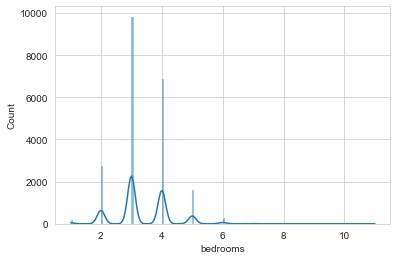

In [78]:
sns.histplot(data=data_attempt_8, x="bedrooms", kde=True)

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

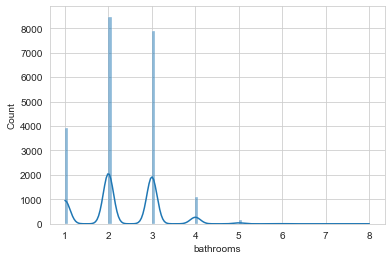

In [79]:
sns.histplot(data=data_attempt_8, x="bathrooms", kde=True)

<AxesSubplot:xlabel='sqft_bin', ylabel='Count'>

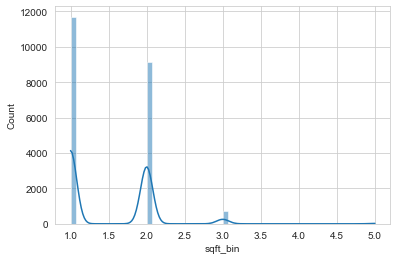

In [80]:
sns.histplot(data=data_attempt_8, x="sqft_bin", kde=True)

<AxesSubplot:xlabel='price_bin', ylabel='Count'>

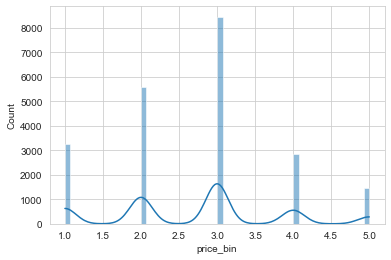

In [81]:
sns.histplot(data=data_attempt_8, x="price_bin", kde=True)

<AxesSubplot:xlabel='basement_bin', ylabel='Count'>

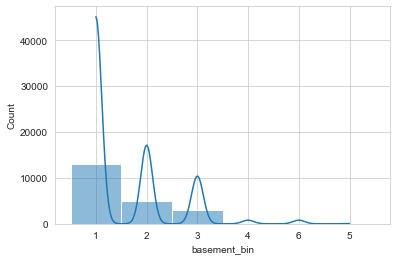

In [82]:
sns.histplot(data=data_attempt_8, x='basement_bin', kde=True)

We clearly see, that there are some dominant bins:
- for sqft_living bins 1 and 2 
- for basement 1 (which means, that most people don't have a basement) 
- for price the biggest bin is 3 (700.000-1000.0000).

**Getting a fresh dataset for the next bin attempt**

In [83]:
data_attempt_8_1= data_attempt_8.copy()

In [84]:
data_attempt_8 = data_attempt_8.drop(['sqft_living', 'sqft_basement', 'price'], axis=1)

## Standard Scaler

Linear Regression


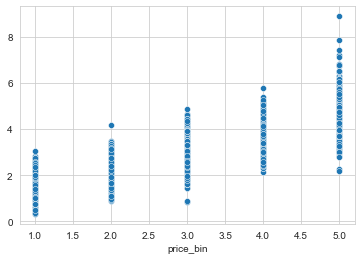

KNeighbors Regressor


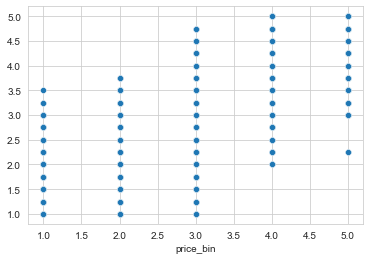

MLP Regressor


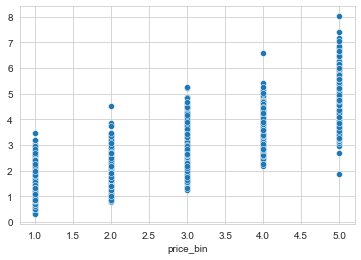

Polynomial Features


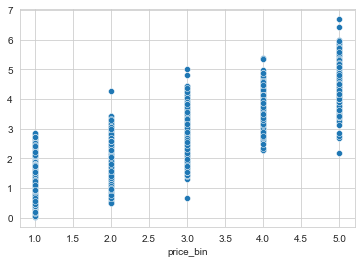

Decision Tree


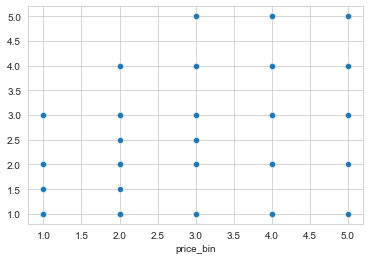

Random Forest


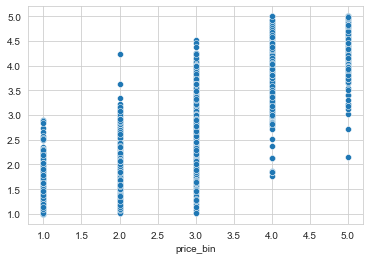

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name    mae    mse  root_mse     r2     adjr2    re
5         Random Forest  0.314  0.203     0.450  0.824  0.823510  0.15
3   Polynomial Features  0.411  0.273     0.523  0.762  0.761337  0.20
1  KNeighbors Regressor  0.358  0.275     0.525  0.761  0.760334  0.16
2         MLP Regressor  0.429  0.308     0.555  0.732  0.731253  0.20
0     Linear Regression  0.464  0.345     0.587  0.701  0.700167  0.22
4         Decision Tree  0.345  0.392     0.626  0.659  0.658050  0.16

In [85]:
from sklearn.model_selection import train_test_split        
from sklearn.preprocessing import StandardScaler
# dropping the target feature
X = data_attempt_8.drop(['price_bin'], axis=1)
y = data_attempt_8['price_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# applying the standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# model evaluation
model_evaluation(X_train, X_test, y_train, y_test)

## Min Max Scaler

Linear Regression


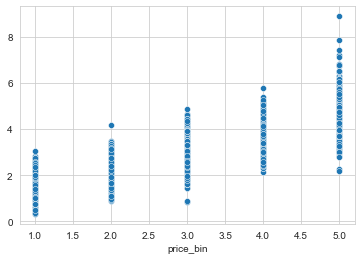

KNeighbors Regressor


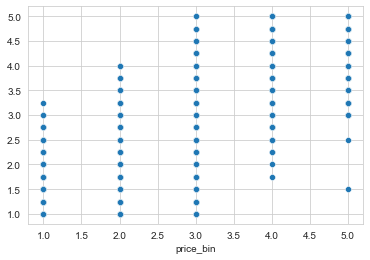

MLP Regressor


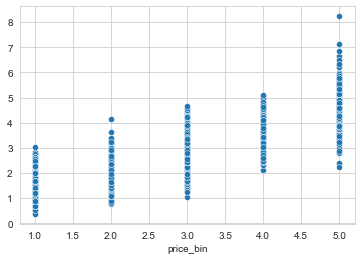

Polynomial Features


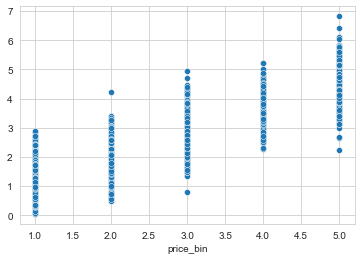

Decision Tree


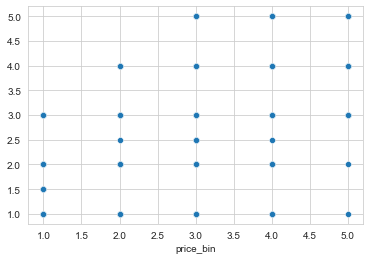

Random Forest


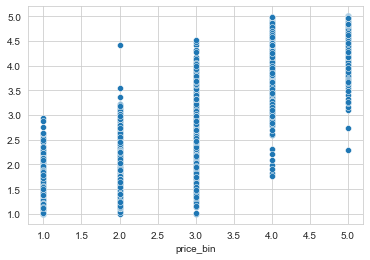

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name    mae    mse  root_mse     r2     adjr2    re
5         Random Forest  0.314  0.201     0.449  0.825  0.824512  0.14
3   Polynomial Features  0.412  0.275     0.524  0.762  0.761337  0.20
1  KNeighbors Regressor  0.359  0.276     0.526  0.760  0.759331  0.16
2         MLP Regressor  0.441  0.314     0.560  0.727  0.726239  0.20
0     Linear Regression  0.464  0.345     0.587  0.701  0.700167  0.22
4         Decision Tree  0.352  0.401     0.633  0.652  0.651030  0.16

In [86]:
from sklearn.model_selection import train_test_split  

# dropping the target feature
X = data_attempt_8.drop(['price_bin'], axis=1)
y = data_attempt_8['price_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# applying the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax =  MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform (X_test)

# model evaluation
model_evaluation(X_train, X_test, y_train, y_test)



## Normalizer


Linear Regression


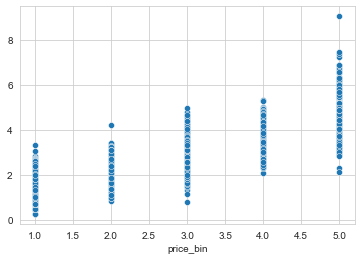

KNeighbors Regressor


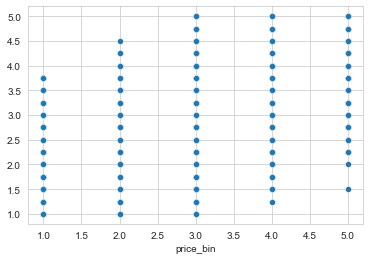

MLP Regressor


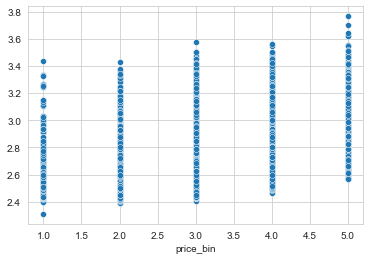

Polynomial Features


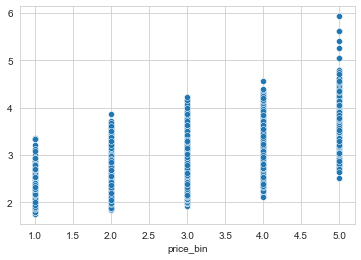

Decision Tree


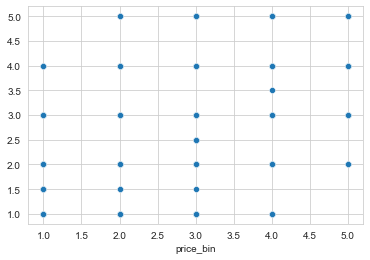

Random Forest


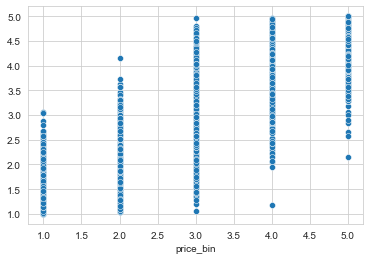

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name    mae    mse  root_mse     r2     adjr2    re
5         Random Forest  0.400  0.293     0.542  0.745  0.744290  0.19
0     Linear Regression  0.456  0.335     0.579  0.709  0.708189  0.21
4         Decision Tree  0.463  0.574     0.758  0.501  0.499610  0.21
3   Polynomial Features  0.706  0.728     0.853  0.368  0.366239  0.37
1  KNeighbors Regressor  0.674  0.730     0.855  0.366  0.364234  0.33
2         MLP Regressor  0.827  1.009     1.005  0.123  0.120557  0.44

In [87]:
# dropping the target feature
X = data_attempt_8.drop(['price_bin'], axis=1)
y = data_attempt_8['price_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

from sklearn.preprocessing import Normalizer
norm =  Normalizer()
X_train = norm.fit_transform(X_train)
X_test = norm.transform (X_test)
# model evaluation
model_evaluation(X_train, X_test, y_train, y_test)

## Attempt 8.1: Target feature not binned


For another attempt with bins we will leave the price outside them



In [88]:
data_attempt_8_1 = data_attempt_8_1.drop(['sqft_living', 'sqft_basement', 'price_bin'], axis=1)

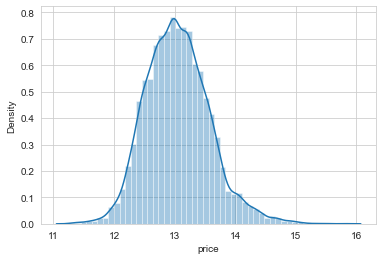

In [89]:
 # log transformation on target column 'price'
data_attempt_8_1['price'] = data_attempt_8_1['price'].apply(log_transform_clean)
sns.distplot(data_attempt_8_1['price']);
plt.show()


### **Standard** **scaler**

Linear Regression


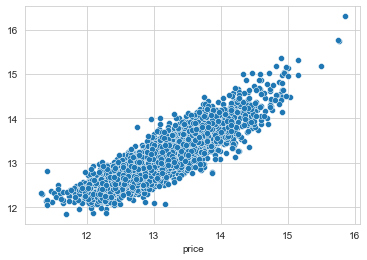

KNeighbors Regressor


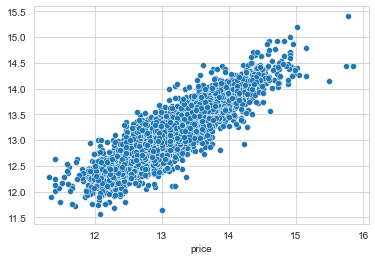

MLP Regressor


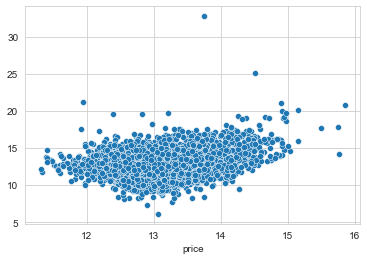

Polynomial Features


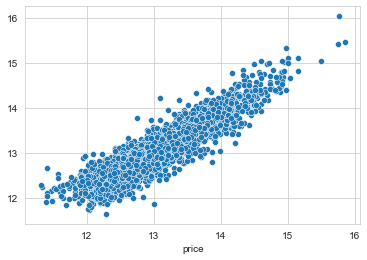

Decision Tree


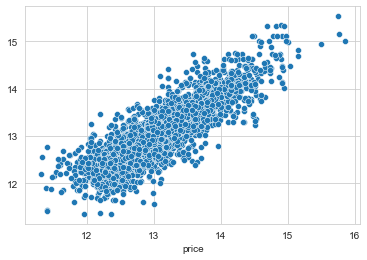

Random Forest


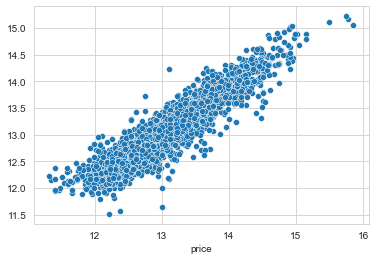

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name    mae    mse  root_mse     r2     adjr2    re
5         Random Forest  0.129  0.034     0.184  0.878  0.877660  0.01
3   Polynomial Features  0.168  0.048     0.219  0.827  0.826518  0.01
1  KNeighbors Regressor  0.160  0.050     0.224  0.820  0.819499  0.01
0     Linear Regression  0.196  0.063     0.252  0.772  0.771365  0.02
4         Decision Tree  0.187  0.068     0.261  0.755  0.754317  0.01
2         MLP Regressor  1.015  1.825     1.351 -5.562 -5.580281  0.08

In [90]:
from sklearn.model_selection import train_test_split        
from sklearn.preprocessing import StandardScaler
# dropping the target feature
X = data_attempt_8_1.drop(['price'], axis=1)
y = data_attempt_8_1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# applying the standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# model evaluation
model_evaluation(X_train, X_test, y_train, y_test)

### **Min Max Scaler**

Linear Regression


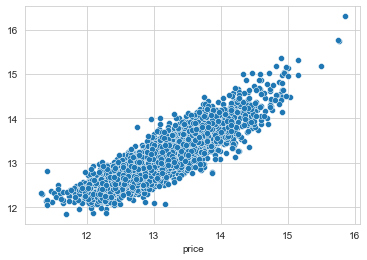

KNeighbors Regressor


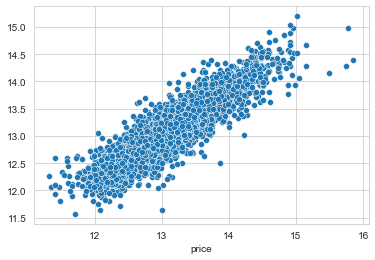

MLP Regressor


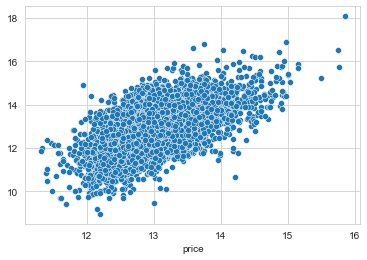

Polynomial Features


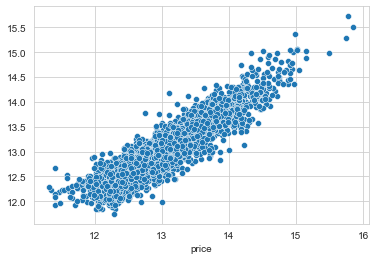

Decision Tree


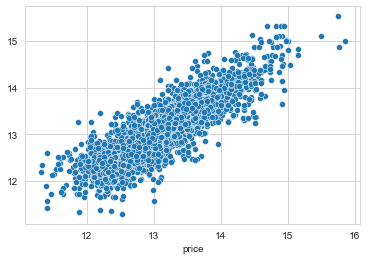

Random Forest


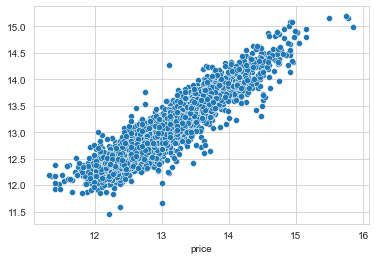

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name    mae    mse  root_mse     r2     adjr2    re
5         Random Forest  0.129  0.034     0.185  0.877  0.876657  0.01
3   Polynomial Features  0.168  0.049     0.220  0.825  0.824512  0.01
1  KNeighbors Regressor  0.160  0.050     0.223  0.821  0.820501  0.01
0     Linear Regression  0.196  0.063     0.252  0.772  0.771365  0.02
4         Decision Tree  0.185  0.067     0.259  0.759  0.758329  0.01
2         MLP Regressor  0.625  0.634     0.796 -1.278 -1.284346  0.05

In [91]:
from sklearn.model_selection import train_test_split  

# dropping the target feature
X = data_attempt_8_1.drop(['price'], axis=1)
y = data_attempt_8_1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# applying the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax =  MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform (X_test)

# model evaluation
model_evaluation(X_train, X_test, y_train, y_test)

### **Normalizer**

Linear Regression


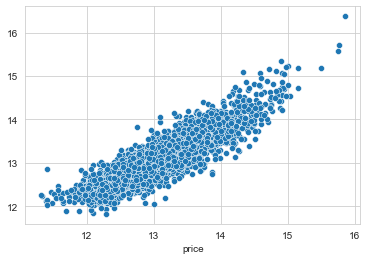

KNeighbors Regressor


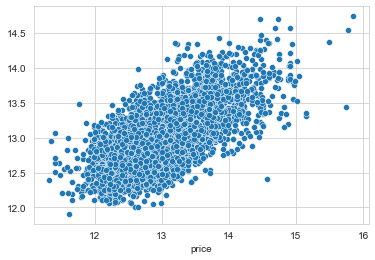

MLP Regressor


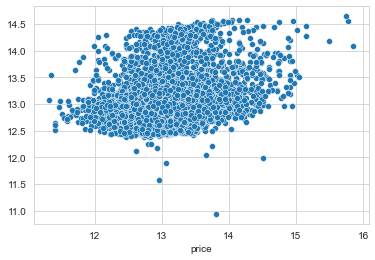

Polynomial Features


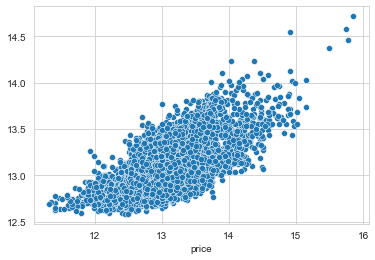

Decision Tree


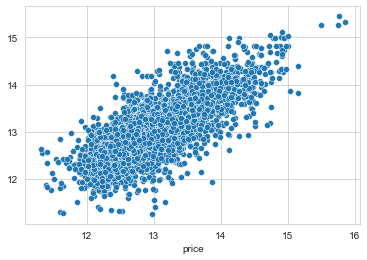

Random Forest


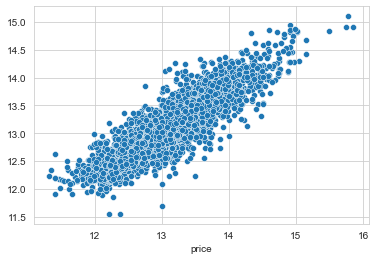

Random Forest has the lowest Mean Absolute Error
Random Forest has the lowest Mean Squared Error
Random Forest has the lowest Rooted Mean Squared Error
Random Forest has the highest R2
Random Forest has the highest Adjusted R2
Random Forest has the lowest Relative Error


name    mae    mse  root_mse     r2     adjr2    re
5         Random Forest  0.173  0.057     0.240  0.793  0.792423  0.01
0     Linear Regression  0.193  0.062     0.249  0.778  0.777382  0.01
4         Decision Tree  0.247  0.119     0.344  0.574  0.572813  0.02
1  KNeighbors Regressor  0.314  0.162     0.403  0.416  0.414373  0.02
3   Polynomial Features  0.324  0.164     0.405  0.411  0.409359  0.02
2         MLP Regressor  0.466  0.336     0.580 -0.208 -0.211365  0.04

In [92]:
# dropping the target feature
X = data_attempt_8_1.drop(['price'], axis=1)
y = data_attempt_8_1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

from sklearn.preprocessing import Normalizer
norm =  Normalizer()
X_train = norm.fit_transform(X_train)
X_test = norm.transform (X_test)

# model evaluation
model_evaluation(X_train, X_test, y_train, y_test)

We can see that the second  bin attempt has slightly improved the model (Linear Regression of the raw data 0.68 changed to 0.77.
However, since we are aiming for at least 0.90, this were not very successful attempts.

# Final Attempt
Here is what we did:

    - drop duplicates ('id')
    - change typo ('bedrooms': 33 -> 3)
    - get 'distance_to_seattle'
    - get 'city', 'population_density', 'median_home_value', 'median_houshold_income'
    - dummiefy cities (categorical)
    - drop 'id', 'location' (genereated from 'lat'& 'long' for 'distance_to_seattle')
    - log transform  target 'price' and high skews 'sqft_lot' and 'sqft_lot15'; for the rest use StandardScaler 

**Getting a fresh dataset (with 'id')**

In [93]:
data_final_attempt = pd.read_sql_query('SELECT * from house_price_data', engine)
data_final_attempt.shape

(21597, 20)

**Generate distance to nearest major city Seattle (Downtown)**

In [94]:
from haversine import haversine_vector, Unit,haversine
seattle = tuple([47.608013, -122.335167])
data_final_attempt['location'] = tuple(zip(data_final_attempt['lat'], data_final_attempt['long']))

dist_seattle = []
for i in data_final_attempt['location']:
    dist_seattle. append(haversine((seattle),(i),unit = 'mi'))

data_final_attempt['distance_to_seattle'] = pd.Series(dist_seattle)
data_final_attempt = data_final_attempt.drop(['location'],axis=1)
data_final_attempt.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3        1.0         1180      5650     1.0           0   
1  6414100192         3        2.0         2570      7242     2.0           0   
2  5631500400         2        1.0          770     10000     1.0           0   
3  2487200875         4        3.0         1960      5000     1.0           0   
4  1954400510         3        2.0         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15   price  \
0    98178  47.5112 -122.257           1340        5650  221900   
1    98125  47.7210 -122.319           1690        7639  538000   
2    98028  47.7379 -122.233           2720        8062  180000   
3    98136  47.5208 -122.393           1360        5000  604000   
4    98074  47.6168 -122.045           1800        7503  510000   

   distance_to_seattle  
0             7.617592  
1             7.842822  
2            10.155421  
3             6.601563  
4            13.529254

**Dropping duplicates**

In [95]:
data_final_attempt = data_final_attempt.drop_duplicates('id', keep='last')
data_final_attempt.shape

(21420, 21)

**Dropping 'ID'**

In [96]:
#drop id
data_final_attempt = data_final_attempt.drop(['id'], axis=1)

**Replacing the value 33 in 'Bedrooms' for '3' (possible typo)**

In [97]:
data_final_attempt['bedrooms'] = data_final_attempt['bedrooms'].replace(33, 3)
data_final_attempt['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10], dtype=int64)

**Getting the city, population_density, median_household_income, median_home_value from the zipcode**

In [98]:
from uszipcode import Zipcode,SearchEngine

def get_city_name(x):
    search = SearchEngine(simple_zipcode=True)
    zipcode=search.by_zipcode(x)
    return zipcode.major_city

data_final_attempt['city'] = list(map(get_city_name, data_final_attempt['zipcode']))

In [99]:
data_final_attempt['city'].value_counts()

Seattle          8885
Renton           1580
Bellevue         1395
Kent             1193
Kirkland          974
Redmond           971
Auburn            906
Sammamish         793
Federal Way       768
Issaquah          731
Maple Valley      586
Woodinville       468
Snoqualmie        305
Mercer Island     282
Kenmore           282
Enumclaw          233
North Bend        218
Bothell           194
Duvall            190
Carnation         123
Vashon            116
Black Diamond      99
Fall City          79
Medina             49
Name: city, dtype: int64

In [100]:
def get_population_density(x):
    search = SearchEngine(simple_zipcode=True)
    zipcode=search.by_zipcode(x)
    return zipcode.population_density

data_final_attempt['population_density'] = list(map(get_population_density, data_final_attempt['zipcode']))

In [101]:
def get_median_household_income(x):
    search = SearchEngine(simple_zipcode=True)
    zipcode=search.by_zipcode(x)
    return zipcode.median_household_income

data_final_attempt['median_household_income'] = list(map(get_median_household_income, data_final_attempt['zipcode']))

In [102]:
def get_median_home_value(x):
    search = SearchEngine(simple_zipcode=True)
    zipcode=search.by_zipcode(x)
    return zipcode.median_home_value

data_final_attempt['median_home_value'] = list(map(get_median_home_value, data_final_attempt['zipcode']))

**Checking the data**

In [103]:
data_final_attempt.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3        1.0         1180      5650     1.0           0     0   
1         3        2.0         2570      7242     2.0           0     0   
2         2        1.0          770     10000     1.0           0     0   
3         4        3.0         1960      5000     1.0           0     0   
4         3        2.0         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15   price  \
0    98178  47.5112 -122.257           1340        5650  221900   
1    98125  47.7210 -122.319           1690        7639  538000   
2    98028  47.7379 -122.233           2720        8062  180000   
3    98136  47.5208 -122.393           1360        5000  604000   
4    98074  47.6168 -122.045           1800        7503  510000   

   distance_to_seattle       city  population_density  \
0             7.617592    Seattle              4966.0   
1             7.842822    Seattle              6879.0   
2            10.155421    Kenmore              3606.0   
3             6.601563    Seattle              6425.0   
4            13.529254  Sammamish              2411.0   

   median_household_income  median_home_value  
0                    58707             283100  
1                    53044             372000  
2                    82448             386200  
3                    84344             445700  
4                   143686             556000

**Dummifying the column 'city'**

In [104]:
dummy = pd.get_dummies(data=data_final_attempt[['city']], columns=['city'],drop_first=True)

In [105]:
rest = data_final_attempt.drop(['city'], axis=1)
data_final_attempt = pd.concat([rest, dummy], axis=1)
data_final_attempt.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3        1.0         1180      5650     1.0           0     0   
1         3        2.0         2570      7242     2.0           0     0   
2         2        1.0          770     10000     1.0           0     0   
3         4        3.0         1960      5000     1.0           0     0   
4         3        2.0         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15   price  \
0    98178  47.5112 -122.257           1340        5650  221900   
1    98125  47.7210 -122.319           1690        7639  538000   
2    98028  47.7379 -122.233           2720        8062  180000   
3    98136  47.5208 -122.393           1360        5000  604000   
4    98074  47.6168 -122.045           1800        7503  510000   

   distance_to_seattle  population_density  median_household_income  \
0             7.617592              4966.0                    58707   
1             7.842822              6879.0                    53044   
2            10.155421              3606.0                    82448   
3             6.601563              6425.0                    84344   
4            13.529254              2411.0                   143686   

   median_home_value  city_Bellevue  city_Black Diamond  city_Bothell  \
0             283100              0                   0             0   
1             372000              0                   0             0   
2             386200              0                   0             0   
3             445700              0                   0             0   
4             556000              0                   0             0   

   city_Carnation  city_Duvall  city_Enumclaw  city_Fall City  \
0               0            0              0               0   
1               0            0              0               0   
2               0            0              0               0   
3               0            0              0               0   
4               0            0              0               0   

   city_Federal Way  city_Issaquah  city_Kenmore  city_Kent  city_Kirkland  \
0                 0              0             0          0              0   
1                 0              0             0          0              0   
2                 0              0             1          0              0   
3                 0              0             0          0              0   
4                 0              0             0          0              0   

   city_Maple Valley  city_Medina  city_Mercer Island  city_North Bend  \
0                  0            0                   0                0   
1                  0            0                   0                0   
2                  0            0                   0                0   
3                  0            0                   0                0   
4                  0            0                   0                0   

   city_Redmond  city_Renton  city_Sammamish  city_Seattle  city_Snoqualmie  \
0             0            0               0             1                0   
1             0            0               0             1                0   
2             0            0               0             0                0   
3             0            0               0             1                0   
4             0            0               1             0                0   

   city_Vashon  city_Woodinville  
0            0         

Linear Regression


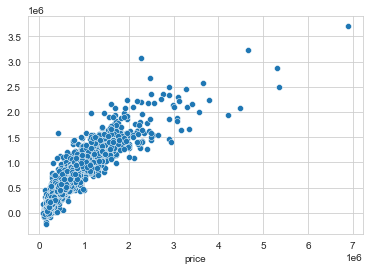

KNeighbors Regressor


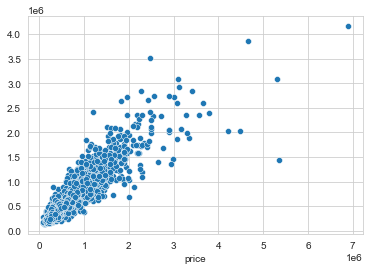

MLP Regressor


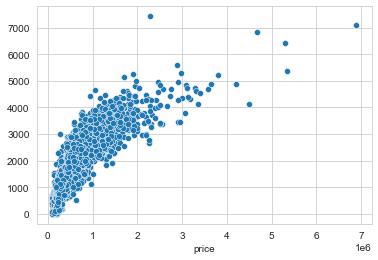

Polynomial Features


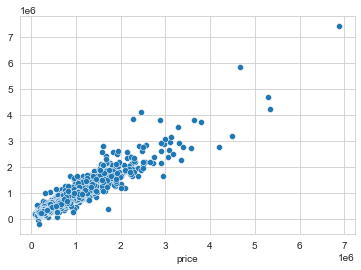

Decision Tree


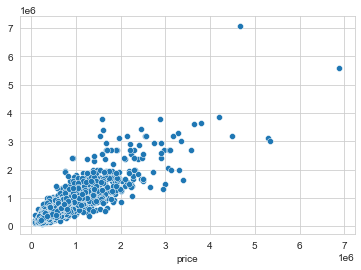

Random Forest


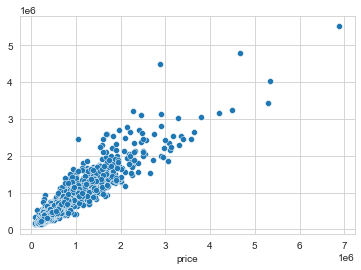

Random Forest has the lowest Mean Absolute Error
Polynomial Features has the lowest Mean Squared Error
Polynomial Features has the lowest Rooted Mean Squared Error
Polynomial Features has the highest R2
Polynomial Features has the highest Adjusted R2
Random Forest has the lowest Relative Error


name         mae           mse    root_mse     r2  \
3   Polynomial Features   71397.024  1.490641e+10  122091.822  0.898   
5         Random Forest   69569.950  1.673508e+10  129364.148  0.886   
1  KNeighbors Regressor   81490.698  2.591609e+10  160984.764  0.823   
0     Linear Regression  100039.688  2.928793e+10  171137.165  0.800   
4         Decision Tree   98976.183  3.292232e+10  181445.091  0.775   
2         MLP Regressor  545500.519  4.435740e+11  666013.522 -2.028   

      adjr2    re  
3  0.897281  0.14  
5  0.885196  0.13  
1  0.821752  0.14  
0  0.798589  0.20  
4  0.773413  0.18  
2 -2.049357  1.00

In [106]:
log_scale_model(data_final_attempt, 'price', ['sqft_lot','sqft_lot15'], 'StandardScaler')

# Checking the correlation for house prices above 650K


In [107]:
data = pd.read_sql_query('SELECT * from house_price_data', engine)
data_above = data.copy()

# splitting the data for values above and below 650K
data_above = data[data['price']>=650000]
data_below = data[data['price']<650000]

In [108]:
# getting the correlation data of price for both datasets
corr_above = data_above.corr()
corr_below = data_below.corr()

In [109]:
# renaming the price column for each dataset
corr_below.rename(columns={'price':'price_below'}, inplace=True)
corr_above.rename(columns={'price':'price_above'}, inplace=True)

In [110]:
# getting the 5 highest correlated data for each one
corr_above = corr_above.sort_values(by=['price_above'],ascending=False)
corr_above['price_above'][:6]

price            1.000000
sqft_living      0.606855
grade            0.507928
sqft_above       0.466493
bathrooms        0.399281
sqft_living15    0.373587
Name: price_above, dtype: float64

In [111]:
corr_below = corr_below.sort_values(by=['price_below'],ascending=False)
corr_below['price_below'][:6]

price            1.000000
lat              0.483544
grade            0.480184
sqft_living      0.443433
sqft_living15    0.402031
sqft_above       0.342408
Name: price_below, dtype: float64

In [112]:
# concatenating both datasets
corr_comparison = pd.concat([corr_above['price_above'],corr_below['price_below']], axis = 1)

<AxesSubplot:>

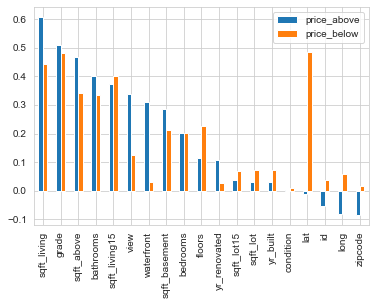

In [113]:
# sorting the results by price above 650000
corr_comparison.sort_values(by=['price_above'],ascending=False)

# plotting the results
corr_comparison[['price_above','price_below']][1:].plot(kind='bar')

<AxesSubplot:>

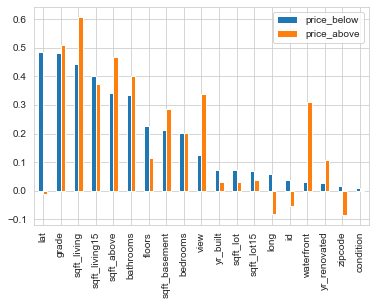

In [114]:
# sorting the results by price below 650000
corr_comparison=corr_comparison.sort_values(by=['price_below'],ascending=False)

# plotting the results
corr_comparison[['price_below','price_above']][1:].plot(kind='bar')

For houses above 650K, sqft_living has the highest correlation( 0.60 ), higher than for those below that price ( 0.44 ). Grade is important for both.
Latitude gets the highest relevance for houses below that price ( 0.48 ), while it's below zero for houses above 650K ( -0.01 ) 

The highest correlation for houses above 650K are sqft_living ( 0.60 ), grade ( 0.50 ), sqft_above ( 0.46 ), bathrooms ( 0.39 ), and sqft_living ( 0.37 )
On the contrary, the highest correlation for houses below 650K are lat ( 0.48 ), grade ( 0.48 ), sqft_living ( 0.44 ), sqft_living15 ( 0.40 ) and sqft_above ( 0.34 )

If we perform this analysis with the new columns created on the final attempt, these are the results

In [115]:
# duplicating the data from the final attempt

data_final_attempt = pd.read_sql_query('SELECT * from house_price_data', engine)
seattle = tuple([47.608013, -122.335167])
data_final_attempt['location'] = tuple(zip(data_final_attempt['lat'], data_final_attempt['long']))
dist_seattle = []
for i in data_final_attempt['location']:
    dist_seattle. append(haversine((seattle),(i),unit = 'mi'))
data_final_attempt['distance_to_seattle'] = pd.Series(dist_seattle)
data_final_attempt = data_final_attempt.drop(['location'],axis=1)
data_final_attempt = data_final_attempt.drop_duplicates('id', keep='last')
data_final_attempt = data_final_attempt.drop(['id'], axis=1)
data_final_attempt['bedrooms'] = data_final_attempt['bedrooms'].replace(33, 3)
data_final_attempt['city'] = list(map(get_city_name, data_final_attempt['zipcode']))
data_final_attempt['population_density'] = list(map(get_population_density, data_final_attempt['zipcode']))
data_final_attempt['median_household_income'] = list(map(get_median_household_income, data_final_attempt['zipcode']))
data_final_attempt['median_home_value'] = list(map(get_median_home_value, data_final_attempt['zipcode']))
dummy = pd.get_dummies(data=data_final_attempt[['city']], columns=['city'],drop_first=True)
rest = data_final_attempt.drop(['city'], axis=1)
data_final_attempt = pd.concat([rest, dummy], axis=1)


# splitting the data for values above and below 650K
data_above = data_final_attempt[data_final_attempt['price']>=650000]
data_below = data_final_attempt[data_final_attempt['price']<650000]

# getting the correlation data of price for both datasets
corr_above = data_above.corr()
corr_below = data_below.corr()

# renaming the price column for each dataset
corr_below.rename(columns={'price':'price_below'}, inplace=True)
corr_above.rename(columns={'price':'price_above'}, inplace=True)

# getting the 5 highest correlated data for each one
corr_above = corr_above.sort_values(by=['price_above'],ascending=False)
corr_above['price_above'][:6]

price            1.000000
sqft_living      0.606892
grade            0.508272
sqft_above       0.466629
bathrooms        0.400428
sqft_living15    0.372911
Name: price_above, dtype: float64

In [116]:
corr_below = corr_below.sort_values(by=['price_below'],ascending=False)
corr_below['price_below'][:6]


price                1.000000
median_home_value    0.619947
lat                  0.484858
grade                0.476756
sqft_living          0.441682
sqft_living15        0.400320
Name: price_below, dtype: float64

The highest correlation for houses above 650K are grade (  0.70 ), sqft_living ( 0.69 ), , sqft_above ( 0.46 ), median_home_value ( 0.69 ), and sqft_living15 (  0.61 )
On the contrary, the highest correlation for houses below 650K are grade (  0.70 ), sqft_living ( 0.69 ), median_home_value ( 0.44 ), sqft_living15 ( 0.69 ) and sqft_living15  (  0.61 )